## Probability and Statistics



## 第1章 Introduction

###  Essence: 全世界$\Omega$を区間$X$でバラバラにして,面積$P$を数える
確率統計とは...:

ある事象について注目した時，世界は多次元の未来に分かれる．例えば「今日は何の服を着よう」と考えたとき，服について，自分のクローゼットにある服の分だけ未来が分岐した多次元宇宙が生じる．それぞれのマルチバースが地図のように二次元に分布しているとして，それを上から眺めてみる



1.   無数に分岐する服の選択肢．それぞれの世界を$\omega$と呼ぶ．また**服についてのマルチバースの全体の集合を$\Omega$と呼ぶ**



2.   この**それぞれのマルチバースの大きさ(面積)を確率$P$**と呼ぶ. よって例えば「この服を着る確率は50%」いう言葉は「全てのマルチバースを見渡した時にこの服を着ている未来世界が5割も占めている」と言うことになる．また，当然何かしらの服は着るので，マルチバース全体$\Omega$の面積を１としておけば通りがいい．

3. では世界をこんなにバラバラにしている要因は何か．マルチバースを発生させて未来を地図のように区切っている要素は何か．それは明らかだ．服だ．**服のように未来をバラバラに区切る線引き要因のことを確率変数$X$と呼ぶ**



確率統計とは，未来世界を分断しまくる$X$に対して，全ての多次元宇宙$\Omega$を俯瞰して，自分が気になる未来の面積$P$を数えることなのである．



**神じゃない僕らは数でゴリ押す**


上で述べたことを踏まえて全編にわたり実験を通して確認するが，実際僕らは神ではないので$\Omega$を俯瞰して面積を数えることができない．その代わりとして，何度も実験をすることで面積を数える(大数の法則)

サイコロの出目の確率

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


score=np.zeros([6,1])
for i in range(0,10000):
  die=np.random.randint(1,7)
  score[die-1] +=1

sum=np.sum(score)
for i in range(0,len(score)):

  print(i+1, "is " , score[i]/sum,"%")

#1/6=0.16666666666666666なので妥当

1 is  [0.1684] %
2 is  [0.1711] %
3 is  [0.1575] %
4 is  [0.1676] %
5 is  [0.1665] %
6 is  [0.1689] %


サイコロの出目が３で割り切れる確率

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


score=np.zeros([2,1])
for i in range(0,100000):
  die=np.random.randint(1,7)
  if die%3==0:
    score[0] +=1
  else:
    score[1] +=1

sum=np.sum(score)
for i in range(0,len(score)):

  print(i, "is " , score[i]/sum,"%")

#2/6=0.3333333333333333なので妥当

0 is  [0.33129] %
1 is  [0.66871] %


## 第2章 Random Variables

### Essence: Xは世界の区分けをする


世界$\Omega$に対してXが区分をつけた結果，その地区の呼び方が決まった.

*   **同時確率**(Joint)とは複数の区分け変数X,Yによる"厳密なる区分け"をした**面積**.   
例: $P(農業している地区X かつ 繊維業している地区Y)$


*   **周辺確率**(Marginal)とは区分け変数を減らした"ザックりとした区分け"をした**面積**.   
例: $P(農業している地区X)=P(X,Y)+P(X,\bar{Y})$


なので当然, **同時確率**→**周辺確率**は計算できるけど，逆はできない  



  
また同時確率を見るだけでは「農業しながら繊維業もしているこの世界に一番貢献している地区」というのは分からない. なぜなら単純に面積がデカければ一位に表彰されてしまうから. 大事なのはむしろ割合であるのでその概念を定義する.


*   **条件付き確率**(Conditional)とは区分け変数同士が占める**面積の割合**  
例: $P(繊維業している地区Y | 農業している地区X)=「農業している地区」のうち実際どれくらい「農業している かつ 繊維業しているんか」=\frac{P(Y,X)}{P(X)}$


### Case1: Joint probability

2つのサイコロX,Yを投げた時にXが2で割り切れてYが3で割り切れる確率



In [ ]:
score=np.zeros([2,1])
for i in range(0,100000):
  die=np.random.randint(1,7)
  die2=np.random.randint(1,7)

  if die%2==0 and die2%3==0:
    score[0] +=1
  else:
    score[1] +=1

sum=np.sum(score)
for i in range(0,len(score)):
  sum=np.sum(score)
  print(i, "is " , score[i]/sum,"%")


#世界に対してXは縦線を6本引き，有効な面積を1/2に，Yは横線を6本引き，有効な面積を1/3にしたから,結局世界は1/6にされた

0 is  [0.1651] %
1 is  [0.8349] %


### Case2: Marginal probability

2つのサイコロX,Yを投げた時にXが2で割り切れてYが3で割り切れる確率を求めた後で，Yを周辺化する

In [ ]:
score=np.zeros([3,1])
for i in range(0,10000):
  die=np.random.randint(1,7)
  die2=np.random.randint(1,7)

  if die%2==0 and die2%3==0:
    score[0] +=1

  elif die%2==0 and not die2%3 == 0:
    score[1] +=1

  else:
    score[2] +=1

sum=np.sum(score)

print("X is " , (score[0]+score[1])/sum,"%")

#世界に対してXは縦線を6本引き，有効な面積を1/2に，Yが引くいかなる線も無視したから結局世界は1/2にされた


X is  [0.5046] %


Joint→Maginalは計算できるけど逆はできない(普通はね)







### Case3: Conditional probability

2つのサイコロX,Yを投げた時に，Xが2で割り切れたうちで，その時にさらにYが3で割り切れた割合

In [ ]:
score=np.zeros([2,1])

for i in range(0,10000):
  die=np.random.randint(1,7)
  die2=np.random.randint(1,7)

  if die%2==0:
    score[1] +=1

  if die%2==0 and die2%3==0:
    score[0] +=1





print("conditional is", score[0]/score[1])




#世界に対してXは縦線を6本引き，有効な面積は1/2，その中でYは横線を6本引き，有効な面積は1/3*1/2だから,Xの面積の1/3の割合でXかつY

conditional is [0.34381298]



面積の割合なのだから，面積にかけて面積を出すことにも使える:  

Q. トランプを一枚引き，その色を確認しデッキには戻さない．もう一度デッキからトランプを引き色を確認する．その色が同じである確率$P(X=Y=\text{the same color})$を求めよ

A. これは一度目の因果が次の影響するから条件付き確率(割合)を使えばいい．例えば黒として，$P(X=Y=\text{black})=P(Y=\text{black}|X=\text{black})P(X=\text{black})$より$=25/51*26/52$  
これが赤のカードも同様なので答えは25/51~0.49(面積)



In [ ]:
score=np.zeros([2,1])


for i in range(0,100000):
  deck=np.arange(1,52+1,1)
  choice=deck[np.random.randint(1,len(deck))]

  deck_d= np.delete(deck, np.where(deck==choice))
  choice2=deck_d[np.random.randint(1,len(deck_d))]


  if choice%2==0 and choice2%2==0:
    score[1] +=1
  elif choice%2==1 and choice2%2==1:
    score[1] +=1

  else:
    score[0] +=1


sum=np.sum(score)
print("the same color is" , score[1]/sum,"%")



the same color is [0.49228] %


### Case4: Bayse Formula

〜確率は因果を超えて〜

条件付き確率が面積ではなく，面積の**割合**ということを利用すれば, $P(X=原因,Y=結果),P(Y=結果)$がわかっている時，
$P(X=原因|Y=結果)$が計算できることは明らかだろう．

これは，「結果が＠＠と観察されたときに，原因が〇〇であった確率」を求めているということであって，まさに結果から原因を推測する逆プロセスができるということなのである．

さながら探偵のようじゃ．さながら関数の逆のようじゃ(yからxを求める)．

まとめると，これがベイスの公式
$P(X=a|Y=b)=\frac{P(X=a,Y=b)}{P(Y=b)}$  
あ，こっちを意識しておく方が実用的かも    
$P(X=a|Y=b)=\frac{P(Y=b|X=a)P(X=a)}{\Sigma P(Y=b|X)P(X)}$

Q. トランプ52枚をシャッフルし，見ずに一枚引き，金庫に入れる．そしてもう一枚引いてみたところ赤色のカードだった．金庫のカードは何色である可能性が高いか

A. テキトーに予想つけて$P(X=黒色|Y=赤色)$を計算してみる.つまり，２回目引いたのが赤色だったうちで，一回めは黒だった割合

$P(X=黒色|Y=赤色)=P(X=黒色,Y=赤色)/P(Y=赤色)$

は以下のように

$P(X=黒色,Y=赤色)=26/52*26/51$
$P(Y=r)=P(Y=r|X=b)*P(X=b)+P(Y=r|X=r)*P(X=r)=26/51*1/2+*25/51*1/2=(13+25/2)/51$

と分解できるので,

$P(X=黒色|Y=赤色)=13/(13+25/2)=0.50980392156$

わずかにこっちのパラレルワールドの面積の割合がでかい!!!! Q.E.D



In [ ]:

score=np.zeros([2,1])


for i in range(0,100000):
  deck=np.arange(1,52+1,1)
  choice=deck[np.random.randint(1,len(deck))]

  deck_d= np.delete(deck, np.where(deck==choice))
  choice2=deck_d[np.random.randint(1,len(deck_d))]


  if choice2%2==0:
    score[1] +=1
  if choice2%2==0 and choice%2==1:
    score[0] +=1




print("P(1st is black when 2nd is red) is " , score[0]/score[1])



P(1st is black when 2nd is red) is  [0.50476396]


この因果を超えることを直感的に理解したいならカードが赤黒一枚ずつと考えてみな．２回目が赤だったら金庫の中は確定で黒でしょ

### Case4: Independent probability

最後に重要な概念に触れておく．それが独立性だ．これは言い換えが無数にあり，全て挙げると冗長になるのでエッセンスだけいうと

*   XとYが独立

*   XとYがそれぞれ引く区間に全く影響されずに世界をバラバラにする(つまり誰かにお構いなしに直線のグリッドを引く)

*   よってP(X|Y)とP(X|not Y)はまるで変わらん(XはYにお構いなしに世界をバラバラにするから，Yのどの区間でXを見ようともいつも同じ割合).つまりP(X,Y)=P(X)P(Y)と表せる.



変数の数が増えても同じ.X,Y,Zが独立ならXY,YZ,ZXの全てについて上が成り立つ







case1の例題は実は独立ね，お互いのサイコロ同士はお互いを構うことなく世界をぶった斬る



In [ ]:
score=np.zeros([4,1])
for i in range(0,100000):
  die=np.random.randint(1,7)
  die2=np.random.randint(1,7)

  if die%2==0:
    if die2%3==0:
      score[2] +=1
    else:
      score[0] +=1
  elif die2%3==0 and not die%2==0:
    score[1] +=1
  else:
    score[3] +=1

sum=np.sum(score)

print("P(X) is " , (score[0]+score[2])/sum,"%")
print("P(X|Y) is " , score[2]/(score[1]+score[2]))
print("P(X|not Y) is " , score[2]/(score[0]+score[3]-score[1]-score[2]))

print("P(X,Y)=" , score[2]/sum,"%","=P(X|Y)P(Y)=P(X)P(Y)=", (score[0]+score[2])/sum*(score[1]+score[2])/sum,"%")


#世界に対してXはYにお構いなし真っ直ぐな線で面積を1/2に，YはXにお構いなしに真っ直ぐな線で面積を1/3にする．

P(X) is  [0.50187] %
P(X|Y) is  [0.5046462]
P(X|not Y) is  [0.50101511]
P(X,Y)= [0.16781] % =P(X|Y)P(Y)=P(X)P(Y)= [0.16688683] %


これを見ると Joint←Maginalができていることがわかる: P(X)P(Y)=P(X,Y)

そう，独立ならこれができるのだ



またCase3の例題では，それぞれの事象が独立なので，P(X,Y)/P(X)が結局P(X)P(Y)/P(X)=P(Y)になっていることも観察できる


## 第3章 Probability Distribution (discrete)



### Essence: Pは住所別の面積の一覧表


Probability Distribution (確率分布)とは世界の分断をグラフにしたもの．

確かに，確率変数はマルチバース世界をバラバラにするのだけれど，それを人間が観れるか・観れたとしても直感的にすぐに面積を数えられるか(その他の期待値などの処理が簡単にできるか)・多変数が絡むとどうなるか，というのは別の問題になってくる．

→確率変数の世界の分断の様子を，計算しやすいように座標軸に落とし込みたい


それが確率分布．X軸は区間の名前(インデックス),Y軸はそれに対応する面積.

*   座標平面はマルチバース世界とは違うものなので混乱しないように．あくまで確率分布は抽象的なXを見やすく面積とインデックスについて再配置したもの.

なので確率分布は
*   0以下の値をとるとはあり得ない
*   関数の面積の合計は1
*   Xはあくまで住所にすぎない.住所の数え方の取り替えをすると当然面積も変わりゆく




最後のインデックスの取り替えについて．普通のサイコロ面積一覧表を，例えばY=(X-3)**2という新しい住所で置き換えてみるとどうなるか




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


score=np.zeros([6,1])
for i in range(0,10000):
  die=np.random.randint(1,7)
  score[die-1] +=1

sum=np.sum(score)
score2=np.zeros([4,1])
print("BEFORE")
for i in range(0,len(score)):
  print(i+1, "is " , score[i]/sum,"%")

  if (i+1-3)**2 == 0:
    score2[0] +=score[i]
  elif (i+1-3)**2 == 1:
    score2[1] +=score[i]
  elif (i+1-3)**2 == 4:
    score2[2] +=score[i]

  elif (i+1-3)**2 == 9:
    score2[3] +=score[i]

print("AFTER")
sum2=np.sum(score2)
num=["0","1","4","9"]
for j in range(0, len(score2)):

  print(num[j],"is",score2[j]/sum2,"%")

BEFORE
1 is  [0.1645] %
2 is  [0.1728] %
3 is  [0.168] %
4 is  [0.1625] %
5 is  [0.1679] %
6 is  [0.1643] %
AFTER
0 is [0.168] %
1 is [0.3353] %
4 is [0.3324] %
9 is [0.1643] %


→世界の分断の仕方が変わる（もちろん分断した世界の合計は1)

### Case1: Binomial Distribution
二項分布という有名な分布を通してエッセンスを確かめる:

独立な確率変数Zをたくさん用意するZ1, Z2, ...Zn.こいつらに世界をぶった斬ってもらう.こいつらはpという大きさの面積を1と名づけ,1-pという大きさの面積を0と名付けるような変数.



そして区切られた住所を新たにX=Z1+Z2+...+Znと呼ぶことにする.
このようなXの確率分布Pを考えてみる.



1.   Pはただの一覧表なのだから，個別の住所についてまず考えて抽象化すればいい. X=1の住所の面積はどれくらいあるか

2.   まず1を出すZを選んでnC1, その面積はP(Z1=0,Z2=0,,Zi=1...Zn=0)=P(Z1=0)...P(Zi=1)...P(Zn=0) (独立なのでね)となるので, P(X=1) = nC1$p^1(1-p)^{n-1}$

3.  X=kと抽象化しても同じなのでP(X=k) = nCk$p^k(1-p)^{n-k}$が確率分布













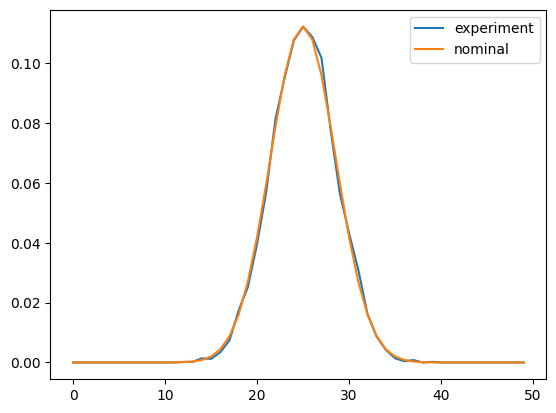

In [ ]:
import random
n=50
p=0.5
Dice=[1,0]
Zs=np.zeros([n,1])
X=np.zeros([n,1])
scale=5000


for j in range(scale):
  for i in range(0,len(Zs)):
    Zs[i]=random.choices(Dice, weights=[p, 1-p])[0] #各Zが1,0どちらをとるかイカサマコインで決定(重みp,1-p)

  index=int(np.sum(Zs))
  X[index] +=1 #その合計をXという確率変数と呼ぶ

plt.plot(X/scale,label="experiment") #Xの分断する世界を見てみる


from scipy.special import comb


Xbi=np.zeros([n,1])
for i in range(0,len(Xbi)):
  nCk=comb(n, i, exact=True)
  Xbi[i] = nCk*p**i*(1-p)**(n-i)


plt.plot(Xbi,label="nominal") #理論値を表示
plt.legend()
plt.show()

**[Another Point of View]**


もし，マルチバース世界の分断の様子(人には見えない)と確率分布（面積とインデックスの一覧表, 数学的に扱いやすい)を統一的な視点で見たいなら，こう考える


→**もともとマルチバース世界はグラフのような形でただ存在している．それをXが分断している．**




## 第3章1節: Expected Value
確率分布を捉える上で重要な二つのメガネの一つ，Expected Value (期待値). これは単純に,Xにぶった斬られた世界が**"ぱっと見はどんな世界に見えるか"を特徴づける値:**

今までただのインデックスだった"X=1"や"X=6"に対して，その地区の番地であるだけでなく，その地区の標高であるとも考えてみる.例えば, X=6の番地がそもそも面積が広かったら,(X=6は標高でもあるので)全体の世界の標高はとても高く見えるんじゃないか.ぱっと見，"この世界はでっけえ丘みたいだな"という印象になる

**つまりは平均的な高さが第一印象になる.**


**平均高さE=総体積L/総面積A**

Lはそれぞれの体積XP(X)の和, Aは当然1 なので,

$E[X]=\frac{X_1P(X_1)+\cdots+X_nP(X_n)}{1}=\Sigma XP(X)$



**[Another Point of View]**

****
もし，マルチバース世界の分断の様子(人には見えない)と確率分布（面積とインデックスの一覧表, 数学的に扱いやすい)を統一的な視点で見たいなら，こう考える


→**期待値とは面積による重み付き平均インデックス.つまり最も典型的なインデックス**
****


 例えばBunomialのE(その世界の平均見の高さ)

In [ ]:
E=np.zeros(n)
Inx=np.arange(1,len(X)+1,1)


for i in range(0,len(X)):
  E[i]= (i+1)*X[i]/scale

print(np.sum(E))

26.060200000000002


### Case1: Changing Variebles

面積のインデックス(高さに相当)を変えると当然平均高さ(期待値)も変わる

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


score=np.zeros([6,1])
for i in range(0,10000):
  die=np.random.randint(1,7)
  score[die-1] +=1

sum=np.sum(score)
score2=np.zeros([4,1])

E_before=0
E_after=0

print("BEFORE")
for i in range(0,len(score)):
  print(i+1, "is " , score[i]/sum,"%")
  E_before += (i+1)*score[i]/sum

  if (i+1-3)**2 == 0:
    score2[0] +=score[i]
  elif (i+1-3)**2 == 1:
    score2[1] +=score[i]
  elif (i+1-3)**2 == 4:
    score2[2] +=score[i]

  elif (i+1-3)**2 == 9:
    score2[3] +=score[i]

print("E_before=",E_before)

print("AFTER")
sum2=np.sum(score2)
num=["0","1","4","9"]


for j in range(0, len(score2)):

  print(num[j],"is",score2[j]/sum2,"%")
  E_after += int(num[j])*score2[j]/sum2
print("E_after=",E_after)




BEFORE
1 is  [0.1641] %
2 is  [0.172] %
3 is  [0.1681] %
4 is  [0.1614] %
5 is  [0.1648] %
6 is  [0.1696] %
E_before= [3.4996]
AFTER
0 is [0.1681] %
1 is [0.3334] %
4 is [0.3289] %
9 is [0.1696] %
E_after= [3.1754]


### Case2: Shift and Scaling

インデックスに定数cを足すと平均の高さがcだけ上がるし，インデックスをc倍すると平均の高さがc倍される

$E[X+c]=E[X]+c$  
$E[cX]=cE[X]$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


score=np.zeros([6,1])
for i in range(0,10000):
  die=np.random.randint(1,7)
  score[die-1] +=1

sum=np.sum(score)
score2=np.zeros([9,1])

E_before=0
E_after=0

print("BEFORE")
for i in range(0,len(score)):
  print(i+1, "is " , score[i]/sum,"%")
  E_before += (i+1)*score[i]/sum


print("E_before=",E_before)

a=1 #平均高さに1足して
b=0.5 #その平均高さを0.5倍する

print("AFTER")

for j in range(0, len(score)):

  E_after += b*(j+1+a)*score[j]/sum


print("E_after=",E_after)


BEFORE
1 is  [0.1631] %
2 is  [0.1668] %
3 is  [0.163] %
4 is  [0.1742] %
5 is  [0.1676] %
6 is  [0.1653] %
E_before= [3.5123]
AFTER
E_after= [2.25615]


### Case3: Adding Variables

平均高さは各変数の平均高さの足し合わせ
$E[X+Y]=E[X]+E[Y]$

*体積はどのタイミングで合計しても変わらないため



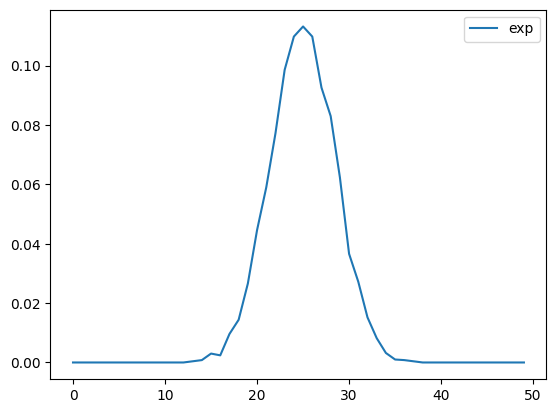

25.9642 25.0


In [ ]:
import random
n=50
p=0.5
Dice=[1,0]
Zs=np.zeros([n,1])
X=np.zeros([n,1])
scale=5000
E=np.zeros([n,1])
Ez=0


for j in range(scale):
  for i in range(0,len(Zs)):
    Zs[i]=random.choices(Dice, weights=[p, 1-p])[0] #各Zが1,0どちらをとるかイカサマコインで決定(重みp,1-p)
    Ez += 1*p +0*(1-p) #各zの期待値　E[z]

  index=int(np.sum(Zs))
  X[index] +=1 #その合計をXという確率変数と呼ぶ

plt.plot(X/scale,label="exp") #Xの分断する世界を見てみる
plt.legend()
plt.show()



for i in range(0,len(X)):
  E[i]= (i+1)*X[i]/scale #X=z+z+...zの期待値　E[X]=E[z]+E[z]+...


print(np.sum(E),Ez/scale)

### Case4: Multiplying Variables

**もし互いに独立なら**，平均高さは各変数の平均高さの積
$E[XY]=E[X]E[Y]$

*独立ならXの区域のどこも同じ割合だけ体積が大きくなるため，E[Y]をスカラーのように扱える


In [ ]:
score=np.zeros([2,1])
score2=np.zeros([2,1])

score3=np.zeros([2,1])


score2=np.zeros([2,1])
for i in range(0,100000):
  die=np.random.randint(1,7)
  die2=np.random.randint(1,7)

  if die%2==0: #Xは面積の1/2を1に，他を0にするインデックス
    score[0] +=1
  else:
    score[1] +=1

  if die2%3==0:#Yは面積の1/3を1に，他を0にするインデックス
    score2[0] +=1
  else:
    score2[1] +=1

  if  die%2==0 and die2%3==0:#XYはXが2で割り切れてYが3で割り切れている時だけ1に，他を0にするインデックス
    score3[0] +=1
  else:
    score3[1] +=1

sum=np.sum(score)

E1=(1)*score[0]/sum

E2=(1)*score2[0]/sum

E3=(1*1)*score3[0]/sum



print("E1,E2,E3=",E1,E2,E3)
print("E1*E2=",E1*E2)


E1,E2,E3= [0.50126] [0.33172] [0.16593]
E1*E2= [0.16627797]


**caution: 期待値が存在しないこともある**

例えば，コイントスn回目で初めて表が出れば2**n円の報酬.この時，一回当たりの期待値は$\frac{1}{2^n}2^n=1$円より試行回数を無限にすると無限円もらえることになる.体積の話にすると，めっちゃ体積小さいけどくっそインデックス(高さ)がデカい塔があることになる．つまり世界の平均高さが閉じない．

この時には期待値が存在しない


## 第3章2節: Variance
確率分布を捉える上で重要な二つのメガネの二つ目，Variance(分散). これは**期待値からのハズレ具合をインデックスにした世界の平均高さのこと.**  

期待値がわかっても，実際に元がどのような世界なのかはわからない.例えばサイコロは期待値(世界の平均高さ)E=3.5だが, 3,4が1/2の確率で出るで出るイカサマサイコロもE=3.5である.この世界の見た目は明らかに違う.



**そのために"期待値からの離れ具合"を高さに採用した世界の平均高さを考える.**


**期待値$\mu$からの離れ具合の平均高さV=離れ具合を高さにした総体積L/総面積A**

離れ具合として二乗和誤差$(X-\mu)^2$を使うので,


$V[X]=\frac{(X_1-\mu)^2P(X_1)+\cdots+(X_n-\mu)^2P(X_n)}{1}=\Sigma (X-\mu)^2P(X)$



さっきの例ではV[サイコロ]=2.916666, V[イカサマサイコロ]=0.25

In [ ]:
V_dice=0
for i in range(1,6+1):
  V_dice += (i-3.5)**2/6
V_cheat=0
for i in range(3,4+1):
  V_cheat += (i-3.5)**2/2
print(V_dice,V_cheat)

2.916666666666667 0.25


### Case1: Standard Deviation

高さの次元が，分散を計算する時に大きくなってしまってるので，Vにルートをかけて二乗を解除する.この値がStandard Deviation(標準偏差) $\sigma$.


何が便利?: まあ次元合わせただけで大した意味はない.グラフとかにはこの値でプロットする

In [ ]:
print("V=sigma^2=",V_dice,V_cheat)
print("sigma=",np.sqrt(V_dice),np.sqrt(V_cheat))

V=sigma^2= 2.916666666666667 0.25
sigma= 1.7078251276599332 0.5


### Case2: Shift and Scaling

インデックスに定数cを足しても，結局平均高さも増えるので，平均高さからの差の値は変わらない.


$V[X+c]=E[(X+c-\mu-c)^2]$  
$=E[(X-\mu)^2]=V[X]$    


インデックスをc倍すると平均高さからの差の二乗の値も二乗倍$c^2$される  

$V[cX]=E[(cX-c\mu)^2]=c^2V[X]$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


score=np.zeros([6,1])
for i in range(0,10000):
  die=np.random.randint(1,7)
  score[die-1] +=1

sum=np.sum(score)
score2=np.zeros([9,1])

E_before=0
V_before=0
E_after=0
V_after=0

print("BEFORE")
for i in range(0,len(score)):
  print(i+1, "is " , score[i]/sum,"%")
  E_before += (i+1)*score[i]/sum

for i in range(0,len(score)):

  V_before += (i+1-E_before)**2*score[i]/sum

print("E_before=",E_before)
print("V_before=",V_before)

a=1 #平均高さに1足して
b=0.5 #その平均高さを0.5倍する

print("AFTER")

for j in range(0, len(score)):

  E_after += b*(j+1+a)*score[j]/sum


for j in range(0, len(score)):
  V_after += (b*(j+1+a)-E_after)**2*score[j]/sum


print("E_after=",E_after)
print("V_before=",V_before)


BEFORE
1 is  [0.1696] %
2 is  [0.17] %
3 is  [0.1628] %
4 is  [0.1683] %
5 is  [0.162] %
6 is  [0.1673] %
E_before= [3.485]
V_before= [2.935175]
AFTER
E_after= [2.2425]
V_before= [2.935175]


**この逆もできる.**

つまりあらゆる確率変数Xに対して，平均高さ$\mu$を引き算で0にして，平均高さからの逸脱$\sigma^2$を割り算で1にすることができる，**(正規化)**

$Y=\frac{X-\mu}{\sigma}$

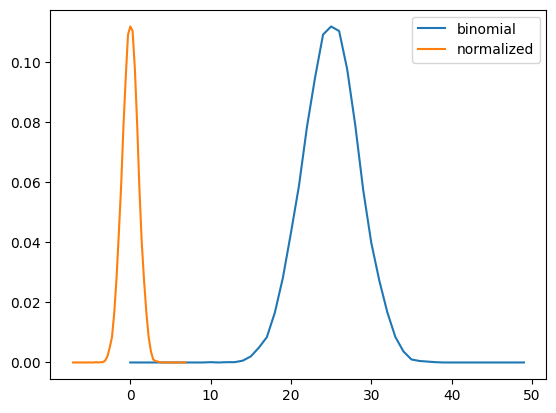

E,V= [25.9626] [12.29660124]
E_y,V_y= [-1.008179e-13] [1.]


In [ ]:
import random
n=50
p=0.5
Dice=[1,0]
Zs=np.zeros([n,1])
X=np.zeros([n,1])
scale=10000

Y=np.zeros([n,1])
E=0
V=0
E_y=0
V_y=0

for j in range(scale):
  for i in range(0,len(Zs)):
    Zs[i]=random.choices(Dice, weights=[p, 1-p])[0] #各Zが1,0どちらをとるかイカサマコインで決定(重みp,1-p)

  index=int(np.sum(Zs))
  X[index] +=1/scale #その合計をXという確率変数と呼ぶ


for i in range(0,len(X)):
  E += (i+1)*X[i]
for i in range(0,len(X)):
  V += (i+1-E)**2*X[i]



for i in range(0,len(X)):
  E_y += (i+1-E)/np.sqrt(V)*X[i]
for i in range(0,len(X)):
  V_y += ((i+1-E)/np.sqrt(V)-0)**2*X[i]


for i in range(0,len(X)):
  Y[i] = (i+1-E)/np.sqrt(V)



plt.plot(X,label="binomial") #Xの分断する世界を見てみる
plt.plot(Y,X,label="normalized") #Xの分断する世界を見てみる


plt.legend()
plt.show()

print("E,V=",E,V)
print("E_y,V_y=",E_y,V_y)

### Case3: Adding Variables

**もし互いに独立なら**平均高さからのブレは各変数の平均高さからのブレの足し合わせ
$V[X+Y]=V[X]+V[Y]$

*分散を計算する過程でE[XY]がE[X]E[Y]に分解できる必要があるため.


proof  
$V[X+Y]=E[(X+Y-\mu-\upsilon)^2]=E[(X-\mu)^2+2(X-\mu)(Y-\upsilon)+(Y-\upsilon)^2]=V[X]+V[Y]+2E[(X-\mu)(Y-\upsilon)]$  
X, Y は互いに独立なので期待値の積を分けられる
$E[(X-\mu)(Y-\upsilon)]=E[X-\mu]E[Y-\upsilon]=0*0$  

Q.E.D



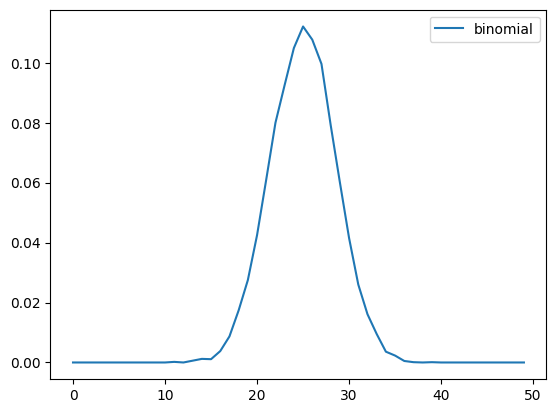

E,V= [25.9888] [12.49027456]
E_z,V_z= 0.5 0.25
n*E_z,n*V_z= 25.0 12.5


In [ ]:
import random
n=50
p=0.5
Dice=[1,0]
Zs=np.zeros([n,1])
X=np.zeros([n,1])
scale=10000


E=0
V=0
E_z=0
V_z=0

for j in range(scale):
  for i in range(0,len(Zs)):
    Zs[i]=random.choices(Dice, weights=[p, 1-p])[0] #各Zが1,0どちらをとるかイカサマコインで決定(重みp,1-p)

  index=int(np.sum(Zs))
  X[index] +=1/scale #その合計をXという確率変数と呼ぶ


for i in range(0,len(X)):
  E += (i+1)*X[i]
for i in range(0,len(X)):
  V += (i+1-E)**2*X[i]



E_z=1*p+(0)*(1-p)

V_z= (1-E_z)**2*p+(0-E_z)**2*(1-p)




plt.plot(X,label="binomial") #Xの分断する世界を見てみる


plt.legend()
plt.show()

print("E,V=",E,V)
print("E_z,V_z=",E_z,V_z)
print("n*E_z,n*V_z=",n*E_z,n*V_z)

### Case4: Multiplying Variables

**もし互いに独立でも**，分散は積に分解できない.
$V[XY] \neq  V[X]V[Y]$

proof

$V[XY]= E[(XY-E[XY])^2]$..(i)

ここで，$E[XY]=E[X]E[Y]=\mu \upsilon$より,

(i)=$E[(XY-\mu \upsilon)^2]=E[(XY)^2-2\mu \upsilon XY+(\mu \upsilon)^2]$  
=$E[(XY)^2]-2\mu \upsilon E[XY]+(\mu \upsilon)^2$...(ii)

また,$E[(XY)^2]=E[X^2Y^2]=E[X^2]E[Y^2]=(V[X]+\mu^2)(V[Y]+\upsilon^2)$より


(ii)=$V[X]V[Y]+\mu^2V[Y]+\upsilon^2V[X]$  

Q. E. D



In [ ]:
score=np.zeros([2,1])
score2=np.zeros([2,1])

score3=np.zeros([2,1])


score2=np.zeros([2,1])
for i in range(0,100000):
  die=np.random.randint(1,7)
  die2=np.random.randint(1,7)

  if die%2==0: #Xは面積の1/2を1に，他を0にするインデックス
    score[0] +=1
  else:
    score[1] +=1

  if die2%3==0:#Yは面積の1/3を1に，他を0にするインデックス
    score2[0] +=1
  else:
    score2[1] +=1

  if  die%2==0 and die2%3==0:#XYはXが2で割り切れてYが3で割り切れている時だけ1に，他を0にするインデックス
    score3[0] +=1
  else:
    score3[1] +=1

sum=np.sum(score)

E1=(1)*score[0]/sum

E2=(1)*score2[0]/sum

E3=(1*1)*score3[0]/sum

V1=(1-E1)**2*score[0]/sum+(0-E1)**2*score[1]/sum
V2=(1-E2)**2*score2[0]/sum+(0-E2)**2*score2[1]/sum
V3=(1*1-E3)**2*score3[0]/sum+(0*0+0*1+1*0-E3)**2*score3[1]/sum

print("E1,E2,E3=",E1,E2,E3)
print("E1*E2=",E1*E2)

print("V1,V2,V3=",V1,V2,V3)
print("V1*V2+E1**2*V2+E2**2*V1=",V1*V2+E1**2*V2+E2**2*V1)


E1,E2,E3= [0.50253] [0.33422] [0.16793]
E1*E2= [0.16795558]
V1,V2,V3= [0.2499936] [0.22251699] [0.13972952]
V1*V2+E1**2*V2+E2**2*V1= [0.1397465]


### Case5: Self-squared Expected Value

面白く便利な関係について.  
$X^2$の期待値は分散の二乗と期待値の二乗の和になる:

$E[X^2]=V[X]+\mu^2$

proof:

これ何に見える?$E[X^2]$  
なんか期待値ゼロの変数の分散にも見えない？
$Z=X-\mu$を定義してみると,

$E[X^2]=E[(Z+\mu)^2]=E[Z^2]+2\mu E[Z]+\mu^2$..(i)

これ何に見える?$E[Z^2]$  
期待値ゼロの変数の分散じゃね？

(i)$=V[Z]+2\mu E[Z]+\mu^2$...(ii)  


ここで$E[Z]=0$と，$定数足しても分散変わらんことV[Z]=V[X]$を思い出すと,

(ii)=$V[X]+\mu^2$


## 第3章3節: Law of Large Numbers

1,2,3章の内容の全てが乗っかったまとめの法則，Law of Large Numbers(大数の法則):僕らは試行回数を重ねることで，マルチバースを区切りまくるXの姿を擬似的に掴める.  



まあこの法則が効くのはある性質を持ったXだけなんだけど，それを今言うてもピンと来ないだろうからいきなり実践に入る，その後なら



*   なぜサイコロは何回も投げれば確率が収束するのに
*   パチンコとかのギャンブルは収束せんのか

が分かる.



1回ごとの確率変数を$X$とする．例えばサイコロ1回投げるとかね

n回投げた平均を$Z$とする.

$Z=\frac{X_1+X_2+...X_n}{n}$

このZの平均高さ$E$と平均高さからのズレ$V$をみていく.




*   平均高さE  

$E[Z]=\frac{E[X_1]+E[X_2]+...E[X_n]}{n}$

**それぞれの期待値は$\mu$なので**,  
$=\frac{n\mu}{n}=\mu$



*   平均高さからのズレ$V$  

$V[Z]=V[\frac{X_1+X_2+...X_n}{n}]$

**それぞれが独立なので**,

$=V[\frac{X_1}{n}]+V[\frac{X_2}{n}]+...V[\frac{X_n}{n}]=\frac{n\sigma^2}{n^2}$  
$=\frac{\sigma^2}{n}$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Z=0
n=100000
score=np.zeros([6,1])
for i in range(0,n):
  die=np.random.randint(1,7)
  Z += die/n


print("Z=",Z) #nが増えていくごとに,分散が1/n倍されて，ほぼ期待値通りの値しか出なくなる




Z= 3.4981000000003624


パチンコとかのギャンブルは収束せんのか今ならわかる．上で見た通り，必要な２つの性質を持っていないからだ




*   性質その1: **それぞれのXが分断した世界のインデックスあたりの面積がみんな同じ(→期待値はみんな$\mu$)**

これをidenticalという.$P(X_1=6)=P(X_2=6)=p$
(*ただしどんなふうに分断してるかの形は同じでなくてもいい，インデックスあたりの面積が同じならいい)

*   性質その2: **それぞれのXがグリッド状に世界を分断(=独立→分散を和で分解できる)**

これをindependentという.世界が五目のマスのように分断されている.

パチンコは前後に露骨に影響を受けるから1,2も破られている(ただし1,2の条件は場合によっては緩めることも可能なので絶対に適用できないわけではない)



## 第4章 Probability Distribution (analog)

今まではサイコロやトランプのようにXが離散的なものしか吐き出さないケースを考えてきた(例えばサイコロの目はX=3.141592....みたいなのは取らないでしょう）

この章ではXが連続値の時の面積を考えるが，根本的に大きな問題がある: "**そもそも面積が存在しない問題**"

確率とは面積であった.離散の時にはX=6というインデックス（住所）に対して何かしらの世界の面積が対応した．しかし例えば連続値X=3.141592...はどうだろうか.これはあくまで世界の線を指定しているに過ぎない.線の面積は当然ゼロ$P(X=3.141592...)=0$

**どうしよう**



### Essence: fは住所別の面積のクソ細かい一覧表

先人は考えた「クソ細かく区切れば離散の時みたいにインデックスあたりの面積を考えられるんじゃね？」

$f(x)=\frac{F(x)}{dx}$

これが微小インデックス$dx$あたりの面積$F(X)$

こう定義すれば，面積は積分（足し算）でしか求めることになり，$確率=0$の問題を回避できる.これを確立密度という

．以下のことを忘れずに.



*   0以下の値をとるとはあり得ない
*   面積の合計（積分値）は1
*   $dx$はあくまで住所にすぎない.住所の数え方の取り替えをすると当然面積も変わりゆく


In [ ]:
a=0
b=0.8
dx=0.005
def func(x):
  return 1-abs(x)

X=np.arange(a, b, dx)
P=0

for i in range(1,len(X)):
  f_i=func(X[i-1])
  f_i_1=func(X[i])
  P += (f_i+f_i_1)*dx/2

print("P=",P)


P= 0.47898749999999995



まあ離散と同じ考えでOK.例えば面積の微小インデックスを変える.つまり

$f(x)=\frac{F(x)}{dx}$を$y=g(x)$で新しくインデックスした$\frac{F(x)}{dy}$にしたい.この時$f(x)$はどうなるか.  


→単純に両辺に$\frac{dx}{dy}$をかければ分かる  
$f(x)\frac{dx}{dy}=\frac{F(x)}{dy}$  

ここで$\frac{dx}{dy}=\frac{1}{g(x)^\prime}$と，確率密度は必ず0以上ということを思い出して


$\frac{f(x)}{|g(x)^\prime|}=\frac{F(x)}{dy}$  


In [ ]:
a=2
b=4
dx=0.005
def func(x):
  return np.exp(-x)

X=np.arange(a, b, dx)
P=0

for i in range(1,len(X)):
  f_i=func(X[i-1])
  f_i_1=func(X[i])
  P += (f_i+f_i_1)*dx/2

print("P=",P)

#Y=3X-5というインデックス替えをしたとすると

Y=3*X-5
dy=3*dx
P_y=0

for i in range(1,len(Y)):
  f_i=func((Y[i-1]+5)/3)
  f_i_1=func((Y[i]+5)/3)
  P_y += (f_i+f_i_1)*dy/2

print("P_y=",P_y/3)



P= 0.11692808042545576
P_y= 0.11692808042545566


### Case1: Joint probability

同時確率.

といっても離散と変わらん. ただ
，微小インデックスごとの面積(確立密度)で与えられているので積分して面積に戻してやる必要がある

In [ ]:

from scipy import integrate

# 関数を定義
f = lambda y, x: np.exp(-x-y)

# fを0から1まで数値積分
val, err = integrate.dblquad(f, 0, 1, 0, 1)

print("(1-e^-1)^2=",val)





(1-e^-1)^2= 0.399576400893728


In [ ]:

from scipy import integrate

# 関数を定義
f = lambda y, x: np.exp(-x-y)

# fを0から1まで数値積分
val, err = integrate.dblquad(f, 1, 100, 1, 100)

print("e^-2=",val)





e^-2= 0.13533528323661279


### Case2: Marginal probability


周辺確率.

といっても離散と変わらん. ただ周辺化する変数のインデックスはどこまでも続いているから，積分範囲を$-∞〜 ∞$にしてやらないといけない

$f_{X}(x)=∫^∞_{-∞}f_{X,Y}(x,y)dy$

### Case3: Conditional probability

条件付き確率はどうなるか？

$P(b|a)=\frac{P(X=a,Y=b)}{P(X=a)}$としたいがこのように別々で考えると連続値では0/0になる.

なので"面積の割合"というエッセンスを思い出す.
確立密度がX=aであるような微小インデックスの時にYをbについて積分すればいい.なの条件付き確率密度は,

$f_{X,Y}(X=a,Y)$だ！


と言いたいところだが...これだと積分の合計が1にならないので確立密度の条件2を満たしていない．何かしらのスカラーで割らないと．．．  
あ，$f(X=a,Y)$のyについての積分結果を1にするような定数は，周辺化$\int f_{X,Y}(X=a,Y)dy=f_{X}(X=a)$なので  

条件付き確率密度は,

$\frac{f_{X,Y}(X=a,Y)}{f_{X}(X=a)}$だ！


(あとはこいつをbについてでも積分すれば面積が求まる)




### Case4: Bayse Formula

ベイスの公式の連続値verを考える.

と言っても
$P(X=a|Y=b)=\frac{P(Y=b|X=a)P(X=a)}{\Sigma P(Y=b|X)P(X)}$を連続の世界の言葉に直すだけ  

$f_{X|Y}(X=a|Y=b)=\frac{f_{Y|X}(Y=b|X=a)f_{X}(X=a)}{\int^{∞}_{-∞} f_{Y|X}(Y=b|X)f_{X}(X)dx}$




### Case4: Independent probability

連続の独立性も同じ．大事な言い換えは



*   XとYが独立

*   XとYがそれぞれ引く区間に全く影響されずに世界をバラバラにする(つまり誰かにお構いなしに直線のグリッドを引く)

*   よってf(X|Y)とf(X|not Y)はまるで変わらん(XはYにお構いなしに世界をバラバラにするから，Yのどの区間でXを見ようともいつも同じ割合).つまり$f(X,Y)=f(X)f(Y)$と表せる.



最後の言い換えにもう少し着目すると，$f_{X,Y}(X,Y)=f_X(X)f_Y(Y)$てことは，例えば任意のX=cにおいて世界を切ってみてもYの断面積は定数$f_X(c)$倍にしかならんということ  
=X,Yが独立ならどの断面でも実数倍の段面積しか出てこない

例えばこいつは独立(無回転にしたから共分散が0になってる.今はわからんくてもいい)  

注目すべきはY(あるいはX)を変えながらお山を切っても実数倍のスライスしか出てこない

A= [[2 0]
 [0 5]]
detA= 9.999999999999998
Sigma= [[ 4  0]
 [ 0 25]]


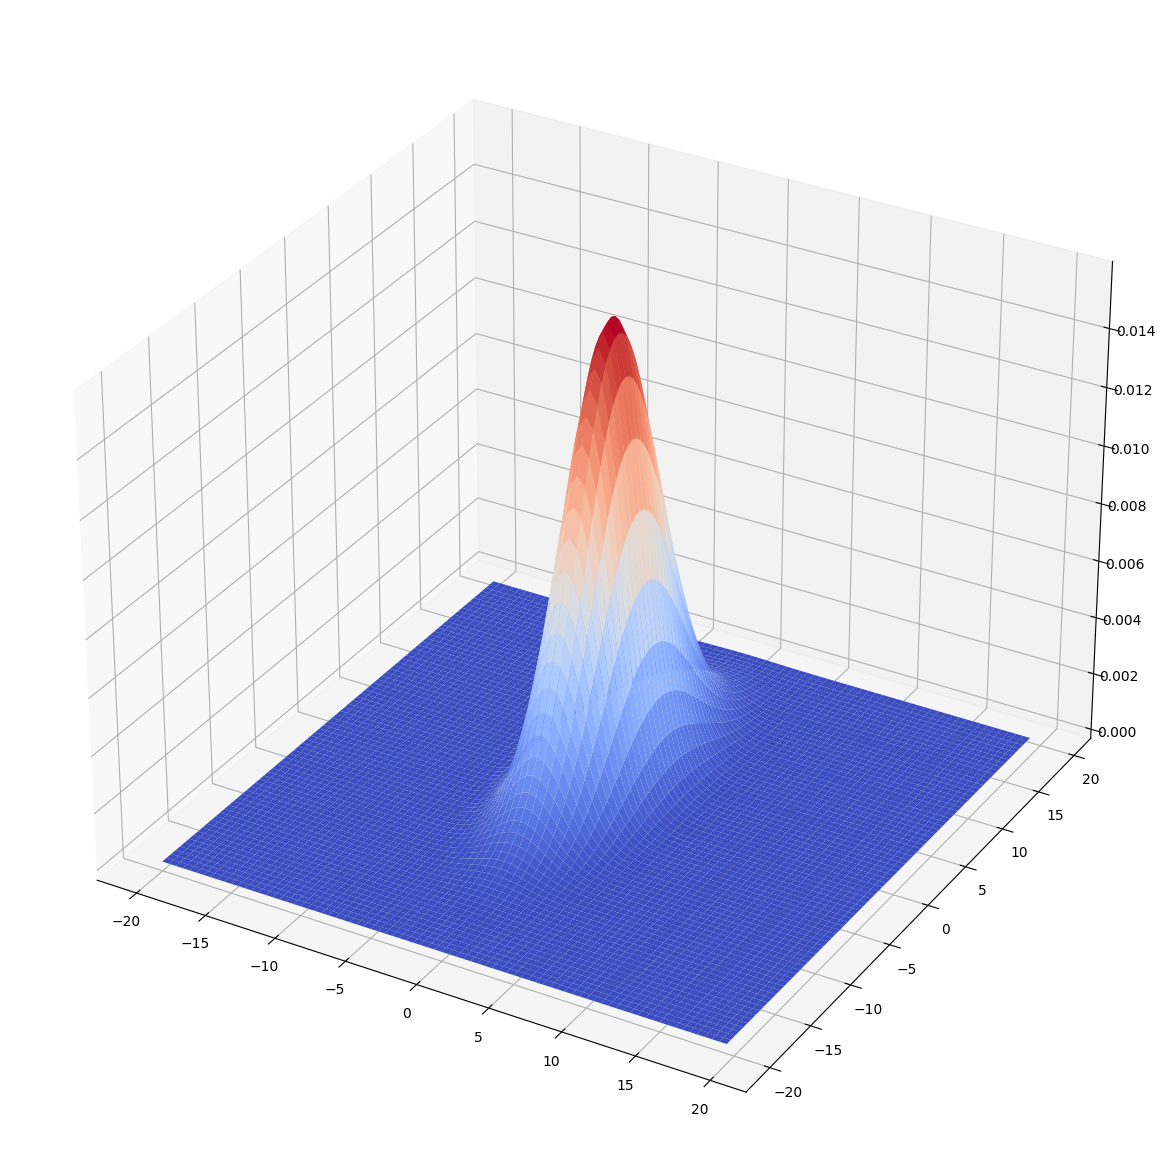

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5) #x,y を-20~20のレンジで0.5ごとに用意
X, Y = np.meshgrid(x, y)

z = np.c_[X.ravel(),Y.ravel()] #メッシュ化


mu = np.array([-1,2]) #平均高さ


D = np.array([[2,0],[0,5]]) #各方向の倍率(軸を2,5倍)
Q= np.array([[1 ,0],[0, 1]]) #回転
A=Q@D
print("A=",A) #倍率回転
print("detA=", np.linalg.det(A))#面積倍率

sigma = A@A.T #はばの二乗
print("Sigma=",sigma)

def gaussian(x):
    #分散共分散行列のdet
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim

    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



上のお山をXで切ったもの.スカラー倍の断面しか出てこないのがわかる


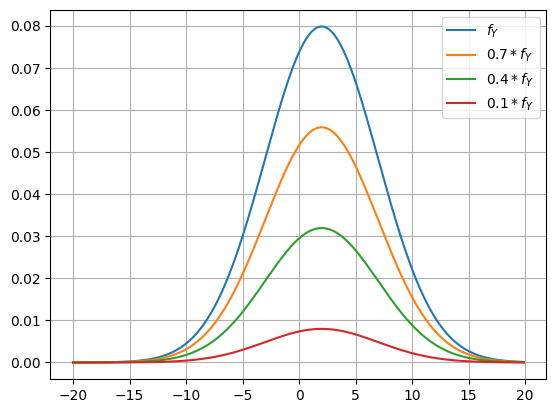

integral value= 0.9998354788659349


In [ ]:
mu=2
sigma=5
def f(x):

  return 1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-mu)**2 )



x=np.arange(-20, 20,0.1)
y=f(x)

plt.plot(x,y,label="$f_{Y}$")
plt.plot(x,0.7*y,label="$0.7*f_{Y}$")
plt.plot(x,0.4*y,label="$0.4*f_{Y}$")
plt.plot(x,0.1*y,label="$0.1*f_{Y}$")
plt.grid()
Ey=x[np.argmax(y)]

plt.legend()
plt.show()
val, err = integrate.quad(f, -20, 20)
print("integral value=",val)

一方でこいつは独立じゃない.つまりは Y(あるいはX)を変えながらお山を切っても実数倍のスライスは出てこない

(Qで回転させてるから.今はわからんくてもいい）

A= [[ 1.41421356 -3.53553391]
 [ 1.41421356  3.53553391]]
detA= 9.999999999999998
Sigma= [[ 14.5 -10.5]
 [-10.5  14.5]]


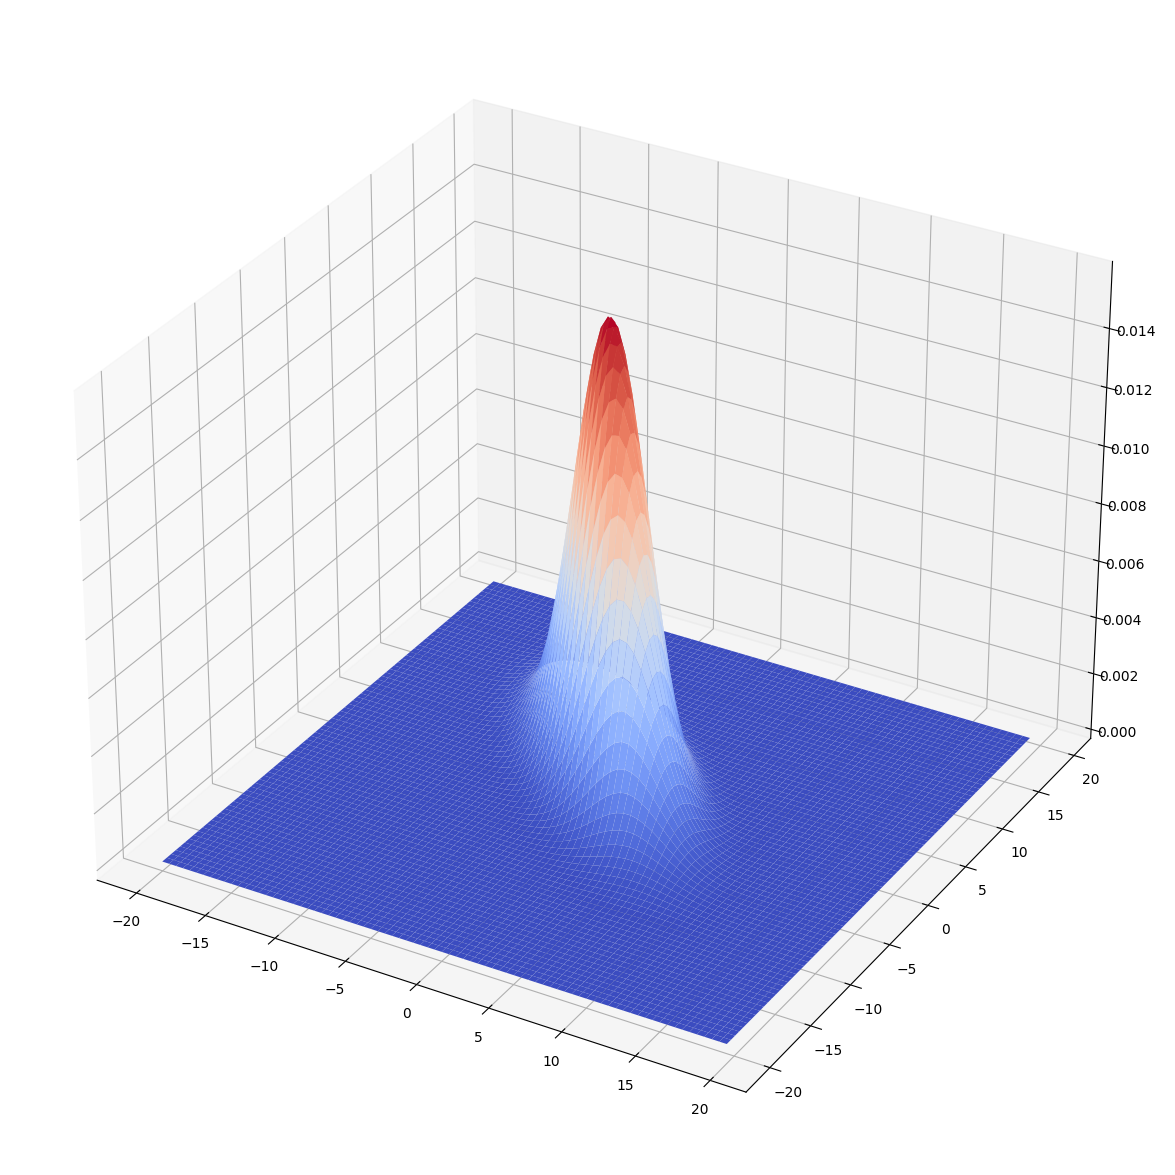

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5) #X,Y を-20~20のレンジで0.5ごとに用意(世界を分断)
X, Y = np.meshgrid(x, y)

z = np.c_[X.ravel(),Y.ravel()] #メッシュ化


mu = np.array([-1,2]) #各平均高さ(平均インデックス)


D = np.array([[2,0],[0,5]]) #各方向の倍率
Q= np.array([[1/2**0.5 ,-1/2**0.5],[1/2**0.5,1/2**0.5]]) #回転
A=Q@D
print("A=",A) #倍率回転
print("detA=", np.linalg.det(A))#面積倍率

sigma = A@A.T #はばの二乗
print("Sigma=",sigma)

def gaussian(x):
    #分散共分散行列のdet
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim

    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)

#3次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



### Case5: Changing Variebles


もう一回ここで変数変換についてちゃんと説明する．


$f(x)=\frac{F(x)}{dx}$を$y=g(x)$で新しくインデックスした$\frac{F(x)}{dy}$にしたい. この時新しい微小面積あたりインデックス$\frac{F(x)}{dy}=f_Y(y)$は$\frac{f_X(x)}{|g(x)^\prime|}$

これは本質的な気持ちは，「インデックスの数字は変わったが，そのあたりの面積が変わることはないので，確率密度に変数変換による増減分をかけてその影響を打ち消したい」ということ


$Z=4X,W=3Y$と新しくインデックスを張り替えたケース.  


インデックスが4,3倍になっても対応する確率(面積)が12倍になるわけではないので，確立密度(微小面積)に増減分をかけて打ち消し

A= [[4 0]
 [0 3]]
detA= 12.0
Sigma= [[16  0]
 [ 0  9]]


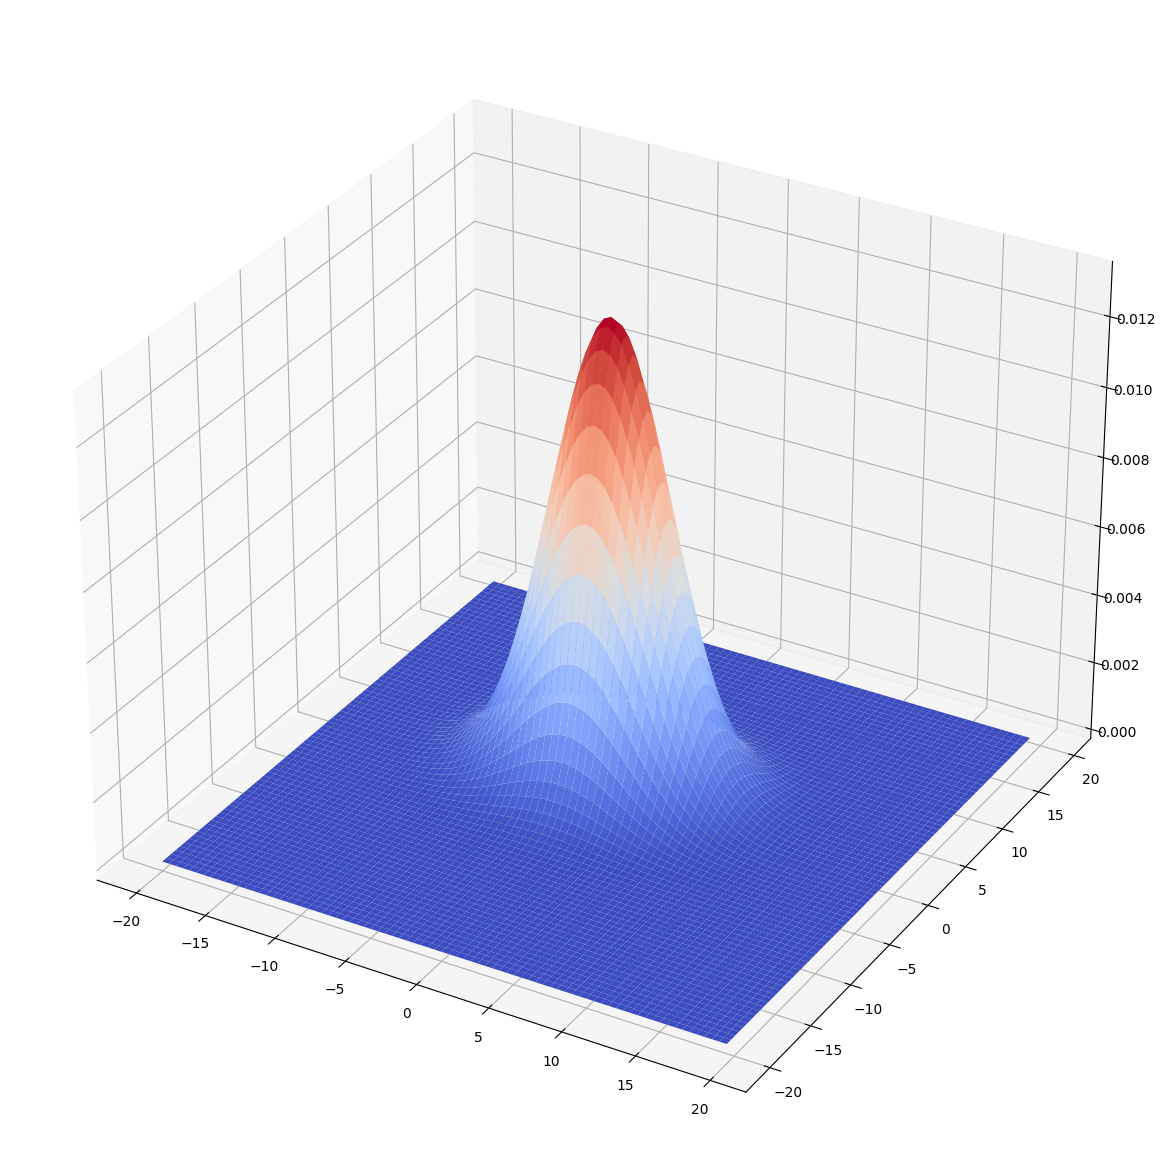

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5) #X,Y を-20~20のレンジで0.5ごとに用意(世界を分断)

X, Y = np.meshgrid(x, y)



z = np.c_[X.ravel(),Y.ravel()]


mu = np.array([-1,2])


D = np.array([[4,0],[0,3]])
Q= np.array([[1,0],[0,1]])
A=Q@D
print("A=",A)
print("detA=", np.linalg.det(A))

sigma = A@A.T
print("Sigma=",sigma)

def gaussian(x):
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    n = x.ndim

    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n ))/12#打ち消し


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



In [ ]:

def Gaus(x,y):

    det = np.linalg.det(sigma)

    inv = np.linalg.inv(sigma)
    X=np.array([[x,y]])
    n = X.ndim

    return np.exp(-np.diag((X - mu)@inv@(X - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n  ))/12 #打ち消し


#ちゃんと引き伸ばし分が補填されてるか確認
val, err = integrate.dblquad(Gaus, -20, 20, -20, 20)

print("世界の体積=",val)


世界の体積= 0.9999989058804537


上は張り替えによって縦方向，横方向に伸びただけだったから，打ち消しの定数を直感的に考えられた．

けど例えば
$\begin{bmatrix}Z\\W \end{bmatrix}=\begin{bmatrix}3 &1\\1&2 \end{bmatrix}\begin{bmatrix}X\\Y \end{bmatrix}$

という変数変換，つまりインデックスを縦横斜めに引き伸ばした場合，打ち消し定数はどう考えればいいか．

エッセンスは変換による面積倍率を打ち消せばいいので，**"変換による面積倍率=行列式det A"**で割ればいい



$\frac{f_X(x)}{\det A}$




A= [[3 1]
 [1 2]]
detA= 5.000000000000001
Sigma= [[10  5]
 [ 5  5]]


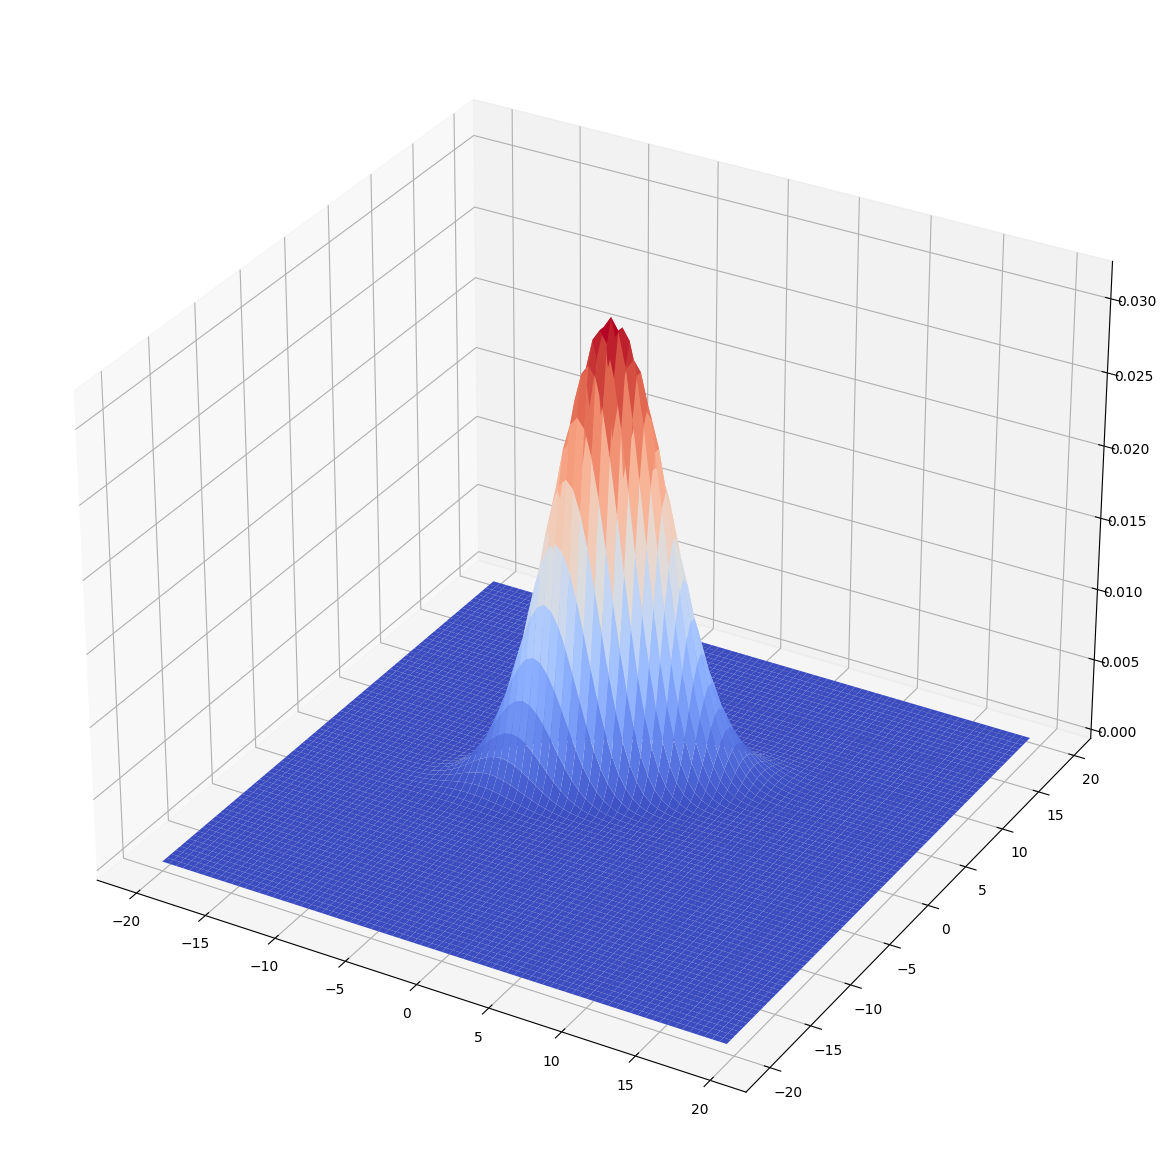

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5) #X,Y を-20~20のレンジで0.5ごとに用意(世界を分断)

X, Y = np.meshgrid(x, y)



z = np.c_[X.ravel(),Y.ravel()]


mu = np.array([-1,2])


A=np.array([[3,1],[1,2]])

print("A=",A)
print("detA=", np.linalg.det(A))

sigma = A@A.T
print("Sigma=",sigma)

def gaussian(x):
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    n = x.ndim

    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n*det ))#打ち消し


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()





さらに抽象的な張替え，つまり非線形な

$\begin{bmatrix}Z\\W \end{bmatrix}=\begin{bmatrix}g(X,Y)\\h(X,Y) \end{bmatrix}$
の場合，つまり面積拡大率が一定じゃない場合はどうするか．

これは行列式の真の姿，ヤコビアンで割ればいい

$\frac{\delta (z,w)}{\delta (x,y)}=\det \begin{bmatrix}\frac{\delta z}{\delta x}&\frac{\delta z}{\delta y}\\ \frac{\delta w}{\delta x}&\frac{\delta w}{\delta y}\end{bmatrix} $


$f(z,w)=f(x,y)\frac{\delta (x,y)}{\delta (z,w)}$




## 第4章1節: Expected Value

確率分布を捉える上で重要な二つのメガネの一つ，Expected Value (期待値).こちらも離散と同じく二つの捉え方ができる



1. E[X]とは:マルチバース世界をXが切りまくった時の，インデックスを標高に採用したときの平均高さ


2. E[X]とは:（上の考えは数学的には扱いにくいので）マルチバース世界が元々グラフのような形で存在していて，それをXがインデックスごとに区切っているとかんがえた時の重み付き平均インデックス

連続値の場合も今までと同じくインデックス$x$と面積$f(x)dx$の積の合計値  

$E[x]=\int^{∞}_{-∞} xf(x)dx$


世界がそれぞれグラフの形で存在し，それをぶった斬った重み付き平均インデックスは，足したグラフをぶった斬った重み付き平均インデックスと同じ $E[X+Y]=E[X]+E[Y]$


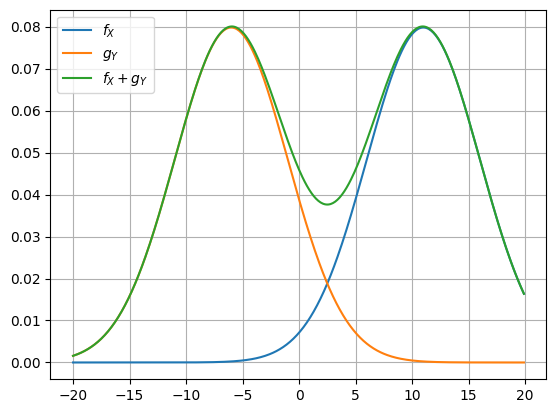

E[X]= 11.000000000000002
E[Y]= -6.0
E[X+Y]= 5.000000000000002


In [ ]:
mu=11
sigma=5

tau=-6

def f(x):

  return 1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-mu)**2 )


def xf(x):

  return x*1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-mu)**2 )


def g(x):

  return 1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-tau)**2 )

def xg(x):

  return x*1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-tau)**2 )


def f_g(x):

  return 1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-tau)**2 )+1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-mu)**2 )

def xf_g(x):

  return x*(1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-tau)**2 )+1/sigma/(2*np.pi)**(0.5)*np.exp(-1/(2*sigma**2)*(x-mu)**2 ))



x=np.arange(-20, 20,0.1)
y=f(x)
y2=g(x)
y3=f_g(x)

plt.plot(x,y,label="$f_{X}$")
plt.plot(x,y2,label="$g_{Y}$")
plt.plot(x,y3,label="$f_{X}+g_{Y}$")
plt.grid()
plt.legend()
plt.show()

val, err = integrate.quad(xf, -100, 100)
print("E[X]=",val)

val, err = integrate.quad(xg, -100, 100)
print("E[Y]=",val)

val, err = integrate.quad(xf_g, -100, 100)
print("E[X+Y]=",val)


世界がグラフのように軸に対称な形で存在するときについて．XはYに関係なく重み付き平均インデックスが決まっており，YはXに関係なく重み付き平均インデックスが決まっている．そのため$E[XY]=E[X]E[Y]$



A= [[2 0]
 [0 3]]
detA= 6.0
Sigma= [[4 0]
 [0 9]]


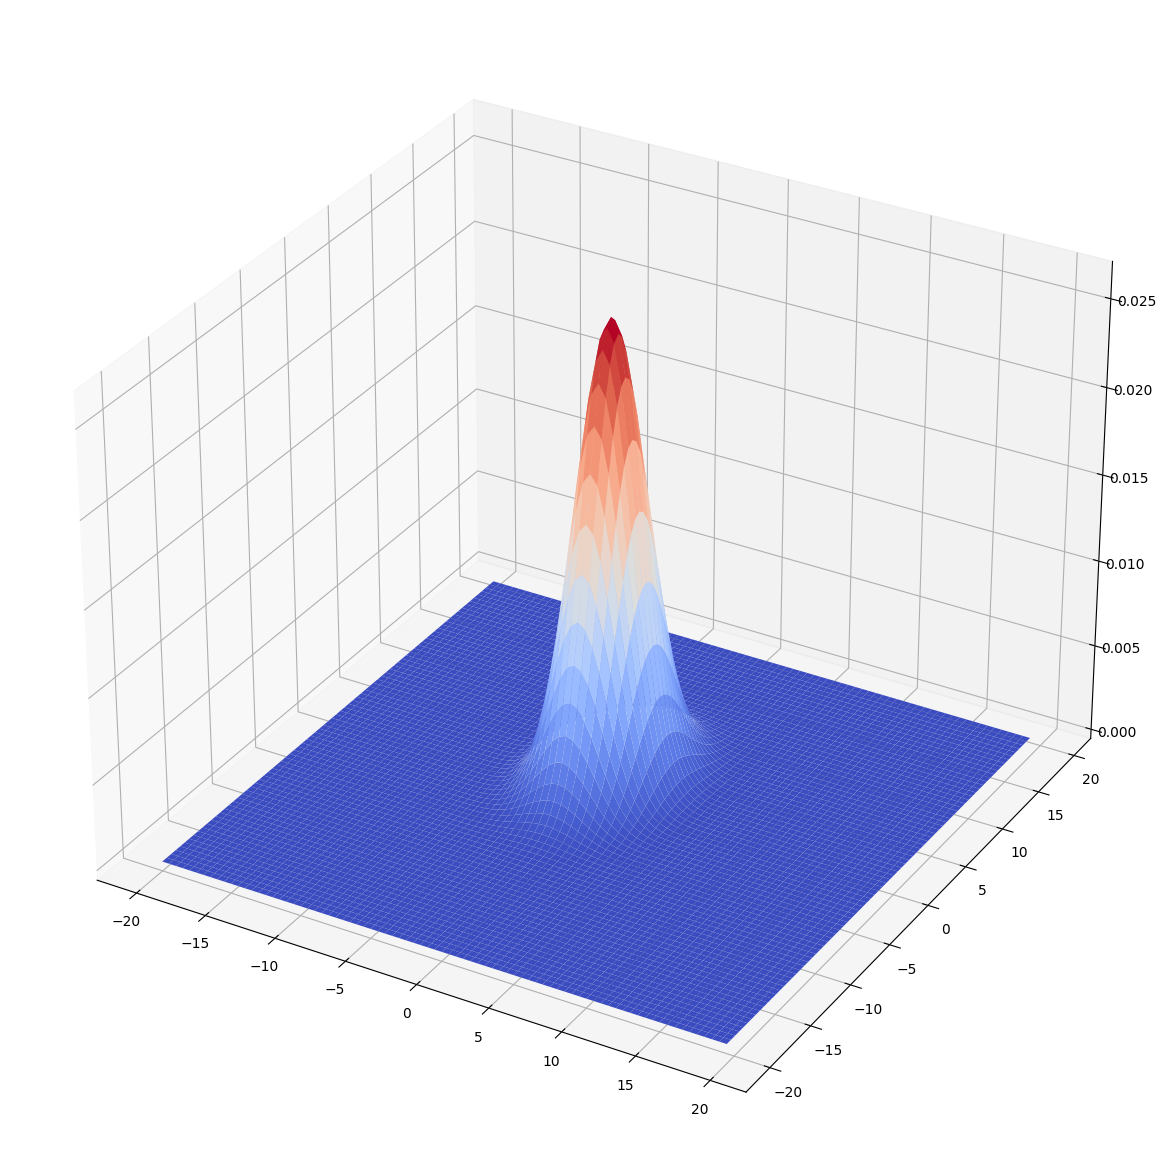

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5) #x,y を-20~20のレンジで0.5ごとに用意
X, Y = np.meshgrid(x, y)

z = np.c_[X.ravel(),Y.ravel()] #メッシュ化


mu = np.array([-1,2]) #平均高さ


D = np.array([[2,0],[0,3]]) #各方向の倍率(軸を2,5倍)
Q= np.array([[1 ,0],[0, 1]]) #回転
A=Q@D
print("A=",A) #倍率回転
print("detA=", np.linalg.det(A))#面積倍率

sigma = A@A.T #はばの二乗
print("Sigma=",sigma)

def gaussian(x):
    #分散共分散行列のdet
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim

    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



## 第4章2節: Variance
確率分布を捉える上で重要な二つのメガネの二つ目，Variance(分散). これは**期待値からのハズレ具合をインデックスにした世界の平均高さのこと.**あるいは**期待値からのハズレ具合をインデックスにした重み付き平均ズレ幅(の二乗).**

$V[X]=E[(X-\mu)^2]$  
$\sigma=\sqrt{V[X]}$

## 第4章3節 Normal Distribution


最後に，一番よく使う確率密度の形を紹介

それがこの釣鐘型 $\exp(-x^2)$→



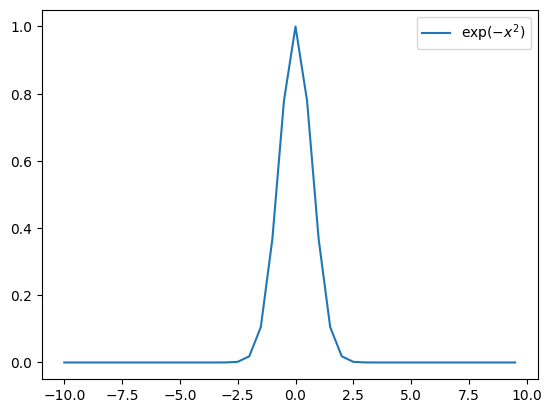

世界の面積= 1.772453850905516


In [ ]:
def f(x):
  return np.exp(-x**2)

x=np.arange(-10, 10, 0.5)
y=f(x)
plt.plot(x,y,label="$\exp(-x^2)$")
plt.legend()
plt.show()

val, err = integrate.quad(f, -10, 10)

print("世界の面積=",val)

けどこれじゃあ，「積分値が1でないとダメ」という確率密度の要件の一つを満たしていない．

ここで，

$∫^{∞}_{-∞}\exp(-\frac{x^2}{a})dx=\frac{1}{2}\sqrt{a\pi}$

なのでそれで割ればいい.これを定数cと呼ぶ

よって$\frac{1}{c}\exp(-\frac{x^2}{a})$が正規分布....!!..?


また，Normal Distributionというからには，$E[X]=0,V[X]=1$であってほしい．



----$E[X]=0$はすでに満たされている:-----------

$∫^{∞}_{-∞}x\frac{1}{c}\exp(-\frac{x^2}{a})dx=0$, 奇関数だからね


------$V[X]=1$にするにはa=2がちょうどいい:---------  
$∫^{∞}_{-∞}x^2\exp(-\frac{x^2}{a})dx=\frac{a}{4}\sqrt{a\pi}$という積分公式より
分散は  
$V[X]=∫^{∞}_{-∞}x^2\frac{1}{c}\exp(-\frac{x^2}{a})dx=\frac{2}{a}$

よってa=2が適当

*************



まとめると$\frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2})$が正規分布.  
$Xは\mathcal{N}(0,1)$に従うと表現する



In [ ]:
def f(x):
  return np.exp(-x**2/2)/(2*np.pi)**0.5

x=np.arange(-10, 10, 0.5)
y=f(x)
plt.plot(x,y,label="$\mathcal{N}(0,1)$")
plt.legend()
plt.show()

val, err = integrate.quad(f, -10, 10)

print("世界の面積=",val)

NameError: ignored

**一般形**  
シフトとスカラー倍で任意の分散と期待値に調整

$Z=\sigma X + \mu$  

$Zは\mathcal{N}(\mu,\sigma^2)$に従う

$f(z)=\frac{1}{\sqrt{2\pi}}\exp(-\frac{(z-\mu)^2}{2\sigma^2})\cdot \frac{dx}{dz}=\frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(z-\mu)^2}{2\sigma^2})$

In [ ]:
mu=3
sigma=2

def f(x):
  return np.exp(-(x-mu)**2/2/sigma**2)/(2*np.pi)**0.5/sigma

x=np.arange(-10, 10, 0.5)
y=f(x)
plt.plot(x,y,label="$\mathcal{N}(0,1)$")
plt.legend()
plt.show()

val, err = integrate.quad(f, -10, 10)

print("世界の面積=",val)

## 第5章 Covariance and Multi-distribution

二変数以上の確率変数の絡み合いを定量的に表していく



## 第5章1節 Covariance


### Essence: 積を見て世界の分断の仕方の特徴を捉える

XとY, 二つの確率変数があってマルチバースをいつものように切り刻んでいたとする，この刻み方に共通点があるか考える．



A= [[3 1]
 [1 2]]
detA= 5.000000000000001
Sigma= [[10  5]
 [ 5  5]]


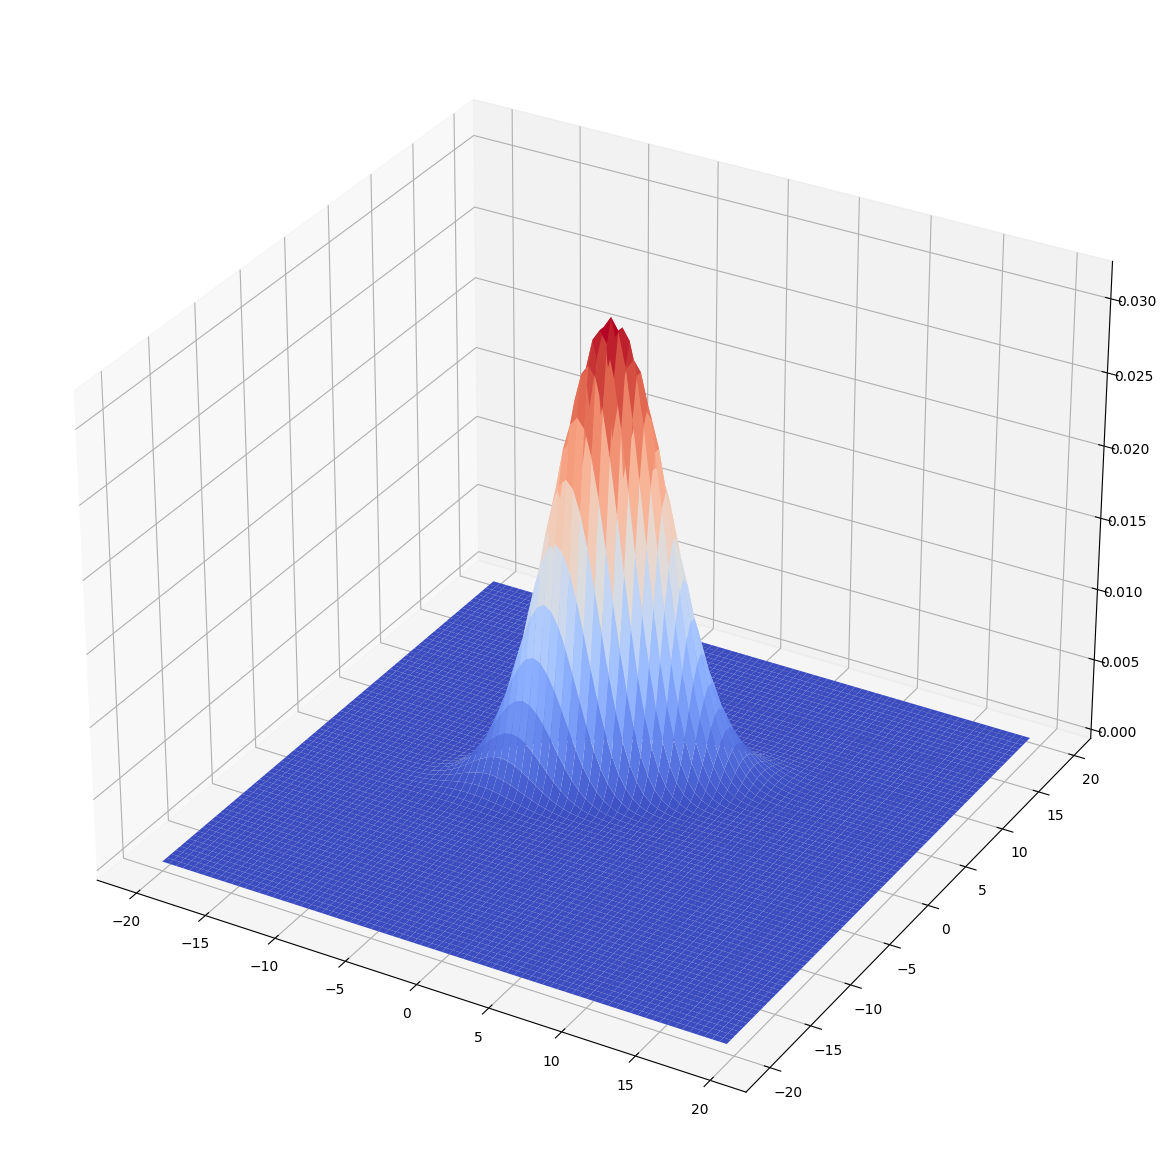

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5)

X, Y = np.meshgrid(x, y)



z = np.c_[X.ravel(),Y.ravel()]


mu = np.array([-1,2])


A=np.array([[3,1],[1,2]])

print("A=",A)
print("detA=", np.linalg.det(A))

sigma = A@A.T
print("Sigma=",sigma)

def gaussian(x):
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    n = x.ndim

    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n*det ))#打ち消し


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



XとYが期待値を軸として正比例したように分断している，もちろん負比例もあり得るだろうし全く無関係なこともあるだろう  

このような比例関係を以下で定義される面積による重み付き積で評価する

$E[(X-\mu)(Y-\upsilon)]$  
これならば,

*   この値が正の時は$(X-\mu)と(Y-\upsilon)$が同符号=第1, 第3象限で刻む=正比例
*   この値が正の時は$(X-\mu)と(Y-\upsilon)$が異符号=第2, 第4象限で刻む=負比例
*   この値が0の時は何の比例関係もない


これをCovariance(共分散)という

### Case1: Shift and Scaling


定義は分散そのものなので性質も同じ．


インデックスに定数を足しても，結局平均高さも増えるので，平均高さからの差の積の値は変わらない.


$Cov[X+a,Y+b]=E[(X+a-\mu-a)(Y+b-\upsilon-b)]$  
$=E[(X-\mu)(Y-\upsilon)]=Cov[X,Y]$    


インデックスを定数倍すると平均高さからの差の積の値も定数倍される  

$Cov[aX,bY]=E[(aX-a\mu)(bY-b\upsilon)]=abCov[X,Y]$




In [ ]:
X=np.array([-6,8,-4,10])
Y=np.array([-7,-5,7,9]) #がそれぞれ1/4で出るとする

Ex=np.sum(X)*1/4 #期待値(面積による重み付き平均インデックス)
Ey=np.sum(Y)*1/4
print("Ex,Ey=",Ex,Ey)
Covxy=0
for i in range(0, len(X)):
  Covxy += (X[i]-Ex)*(Y[i]-Ey)*1/4 #共分散(面積による重み付き平均ズレの積)
print("Covxy=",Covxy)


X=2*X+1 #変数変換してみても
Y=Y-4

Ex=np.sum(X)*1/4
Ey=np.sum(Y)*1/4
print("Ex,Ey=",Ex,Ey)
Covxy=0
for i in range(0, len(X)):
  Covxy += (X[i]-Ex)*(Y[i]-Ey)*1/4
print("Covxy=",Covxy) #定数倍による影響しか出ない


Ex,Ey= 2.0 1.0
Covxy= 14.0
Ex,Ey= 5.0 -3.0
Covxy= 28.0


### Case2: Independent probability
独立の時は期待値の性質よりCovが0になるのは明らか
$Cov[X,Y]=E[(X-\mu)(Y-\upsilon)]=E[X-\mu]E[Y-\upsilon]=0*0$


逆は言えないので注意！！！！！"Cov=0→Independent" is wrong

In [ ]:
#サイコロ２個投げて一つは２の倍数，一つは３の倍数に1のインデックスを与えた時，当然二つの変数は独立

score=np.zeros([2,1])
score2=np.zeros([2,1])

score2=np.zeros([2,1])
for i in range(0,100000):
  die=np.random.randint(1,7)
  die2=np.random.randint(1,7)

  if die%2==0: #Xは面積の1/2を1に，他を0にするインデックス
    score[0] +=1
  else:
    score[1] +=1

  if die2%3==0:#Yは面積の1/3を1に，他を0にするインデックス
    score2[0] +=1
  else:
    score2[1] +=1



sum=np.sum(score)

E1=(1)*score[0]/sum

E2=(1)*score2[0]/sum



Cov=(1-E1)*(1-E2)*score[0]/sum*score2[0]/sum+ (1-E1)*(0-E2)*score[0]/sum*score2[1]/sum+ (0-E1)*(1-E2)*score[1]/sum*score2[0]/sum+ (0-E1)*(0-E2)*score[1]/sum*score2[1]/sum




print("Cov(X,Y)=",Cov)


Cov(X,Y)= [-6.9388939e-18]


### Case3: Correlation Coefficient

共分散の値が大きければ大きいほどふたつの変数は似通った形で世界を分断するのか？

>否！！！！！！！！！

Case1でもみたようにCovの値はスケーリングの影響をそのまま受ける $Cov[aX,bY]=abCov[X,Y]$ので，単純にこの値と他の値を比べられない．  

>だったら！！！！！！！！！


各変数を正規化してから共分散をとると比較できるのじゃないか！(シフトはCovに影響を与えないのでスケーリングだけ施して)

>$Cov[\frac{X}{\sigma_X},\frac{Y}{\sigma_Y}]=\frac{Cov[X,Y]}{\sigma_X \sigma_Y}$

これを相関係数と呼ぼうそうしよう

これならばスケーリングしても値は同じ$Cov[\frac{aX}{a\sigma_X},\frac{bY}{b\sigma_Y}]$

In [ ]:
X=np.array([-6,8,-4,10])
Y=np.array([-7,-5,7,9]) #がそれぞれ1/4で出るとする

Ex=np.sum(X)*1/4 #期待値(面積による重み付き平均インデックス)
Ey=np.sum(Y)*1/4
print("Ex,Ey=",Ex,Ey)
Vx=0
Vy=0
for i in range(0, len(X)): #分散
  Vx += (X[i]-Ex)**2*1/4
for i in range(0, len(Y)):
  Vy += (Y[i]-Ey)**2*1/4
print("Vx,Vy=",Vx,Vy)
Covxy=0
for i in range(0, len(X)):
  Covxy += ((X[i]-Ex)/Vx**0.5)*((Y[i]-Ey)/Vy**0.5)*1/4 #各変数を正規化した共分散
print("nom_Covxy=",Covxy)


X=2*X+1 #変数変換してみても
Y=Y-4

Ex=np.sum(X)*1/4
Ey=np.sum(Y)*1/4
print("Ex,Ey=",Ex,Ey)
Vx=0
Vy=0
for i in range(0, len(X)):
  Vx += (X[i]-Ex)**2*1/4
for i in range(0, len(Y)):
  Vy += (Y[i]-Ey)**2*1/4
print("Vx,Vy=",Vx,Vy)
Covxy=0
for i in range(0, len(X)):
  Covxy += ((X[i]-Ex)/Vx**0.5)*((Y[i]-Ey)/Vy**0.5)*1/4
print("nom_Covxy=",Covxy) #定数倍による影響は出ない


Ex,Ey= 2.0 1.0
Vx,Vy= 50.0 50.0
nom_Covxy= 0.28
Ex,Ey= 5.0 -3.0
Vx,Vy= 200.0 50.0
nom_Covxy= 0.28


Caution!!!!!

共分散ではわからないこともある．世界の分断の仕方が非線形な関係(円や曲線に分断)なら,共分散の値は参考にならない．

また二つ以上の確率変数の相関(高次相関)は分からない!!!!!!



### Case4: Convariance Matrix

世界をさらに超次元の$X_3,X_4...X_n$の変数が分断する場合の共分散を考えていく.  
「全てのペアのCovをしらみつぶしに計算していくの...?」

>否！！！！！！！！！！

行列を使います．

$X=\begin{bmatrix} X_1\\ X_2\\ X_3\\ \cdots \\X_n\end{bmatrix}$

を定義して以下の$n \times n $(つまりn-in n-out)の行列を定義する


$V[X]=E[(X-\mu) (X-\mu)^\top]$  
$=E\begin{bmatrix} (X_1-\mu_1)(X_1-\mu_1)&(X_1-\mu_1)(X_2-\mu_2)&\cdots (X_1-\mu_1)(X_n-\mu_n)\\ \cdots&(X_2-\mu_2)(X_2-\mu_2)&\cdots \\  (X_n-\mu_n)(X_1-\mu_1) &\cdots& (X_n-\mu_n)(X_n-\mu_n)\end{bmatrix}$  


これの対角成分は分散，非対角成分は共分散である．

シフト，スカラー倍は今でと同じく$V[X+cI]=V[X],V[cX]=c^2V[X] $



In [ ]:
X=np.array([-6,8,-4,10])
Y=np.array([-7,-5,7,9]) #がそれぞれ1/4で出るとする

Xs=np.array([X,Y])
mus=np.sum(Xs,axis=1)*1/4
mus=mus.reshape([2,1])
V=(Xs-mus)@(Xs-mus).T*1/4
print("Xs=",Xs)
print("mus=",mus)
print("Xs-mus=",Xs-mus)
print("V[Xs]=",V)

Xs= [[-6  8 -4 10]
 [-7 -5  7  9]]
mus= [[2.]
 [1.]]
Xs-mus= [[-8.  6. -6.  8.]
 [-8. -6.  6.  8.]]
V[Xs]= [[50. 14.]
 [14. 50.]]


今，行列のおかげで，簡単に計算できて，この相関関係のある(Cov=14)ふたりがマルチバースを切っているのは分かったし，それぞれ**各軸方向**に平均のインデックスから$5\sqrt{2}$くらい離れて(V=50)インデックスを広げておるのも分かった．


>では,X軸でもない,Y軸でもない方向には,どれくらいの分散を持つのかはわかるかな?例えば軸を45degree回転させたときの分散は？

これはベクトルを行列で回転させればいい


$AX=\begin{bmatrix}\frac{1}{\sqrt{2}}&-\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}\end{bmatrix}X$  



こうすると$V[X]$は定義より

$V[X]=E[(AX-A\mu)(AX-A\mu)^\top]=AV[X]A^\top$

In [ ]:
X=np.array([-6,8,-4,10])
Y=np.array([-7,-5,7,9])

A=np.array([[1/2**0.5, -1/2**0.5],[1/2**0.5,1/2**0.5]]) #45 degree Rotation
Xs=A@np.array([X,Y])
mus=np.sum(Xs,axis=1)*1/4
mus=mus.reshape([2,1])
V=(Xs-mus)@(Xs-mus).T*1/4
print("Xs=",Xs)
print("mus=",mus)
print("Xs-mus=",Xs-mus)
print("V[Xs]=",V)



Xs= [[ 0.70710678  9.19238816 -7.77817459  0.70710678]
 [-9.19238816  2.12132034  2.12132034 13.43502884]]
mus= [[0.70710678]
 [2.12132034]]
Xs-mus= [[-3.33066907e-16  8.48528137e+00 -8.48528137e+00 -3.33066907e-16]
 [-1.13137085e+01  4.44089210e-16  4.44089210e-16  1.13137085e+01]]
V[Xs]= [[36.  0.]
 [ 0. 64.]]


**面白い．X,Y軸を回転させると共分散が0になる．つまりこのデータ(マルチバース世界)は45度回転した軸に沿って分布してたんやな．**


(...この変数らがだいたい正規分布に従ってるとしてね)

## 第5章2節 Multi-distribution




### Essence: 正規分布を回転させたりシフト・スケールしながら宇宙の形を作る


今までのまとめ的な話だから身構えなくていい

### Case1: Normal Multi-distribution




まず正規分布の多次元verを見てみる

$\mathcal{N}(0,I)=\frac{1}{\sqrt{(2\pi)^n }}\exp(\frac{-1}{2}(X-0)^\top(X-0))$

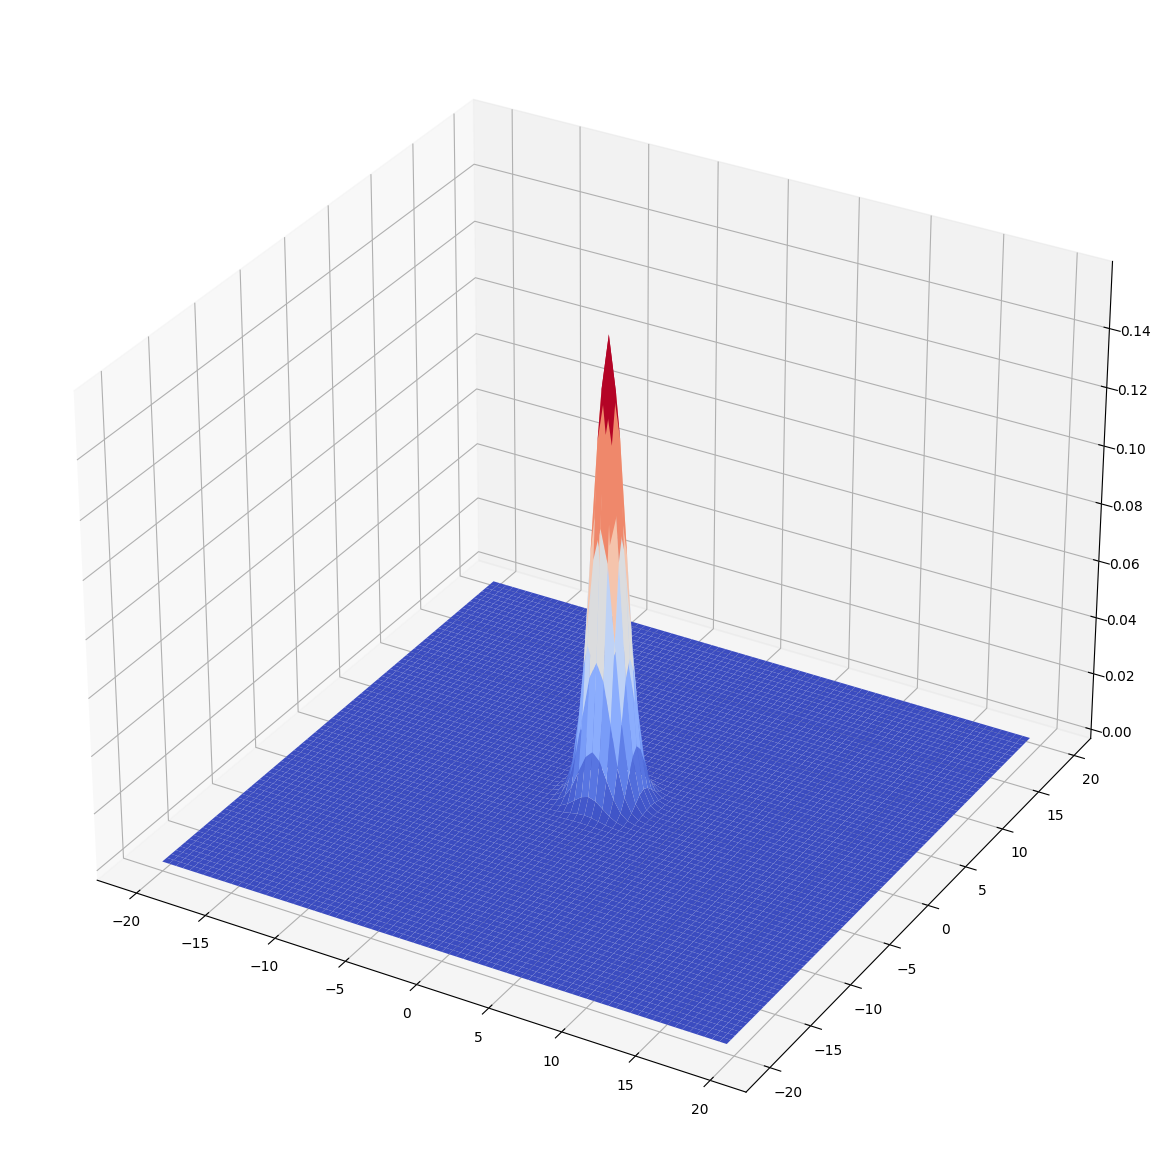

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5)

X, Y = np.meshgrid(x, y)



z = np.c_[X.ravel(),Y.ravel()]



def gaussian(x):
  return np.exp(-np.diag(x@x.T)/2.0) /np.sqrt((2 * np.pi)**2)


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



### Case2: Shift and Scaling



次に単純に，スケーリングとシフトの影響を見る

$X^\prime=\begin{bmatrix}4&0\\0&4\end{bmatrix}\begin{bmatrix}X_1\\X_2\end{bmatrix}+\begin{bmatrix}1\\-2\end{bmatrix}=AX+\mu$
と定義すると変数変換$ dx^\prime=\det A  dx$  
より，

$f_x=\frac{1}{\sqrt{(2\pi)^n }}\exp(\frac{-1}{2}(X-0)^\top(X-0))$

$f_{x^\prime}=\frac{1}{\det A\sqrt{(2\pi)^n }}\exp(\frac{-1}{2}(X^\prime-\mu)^\top(A^{-1})^\top A^{-1}(X^\prime-\mu))$

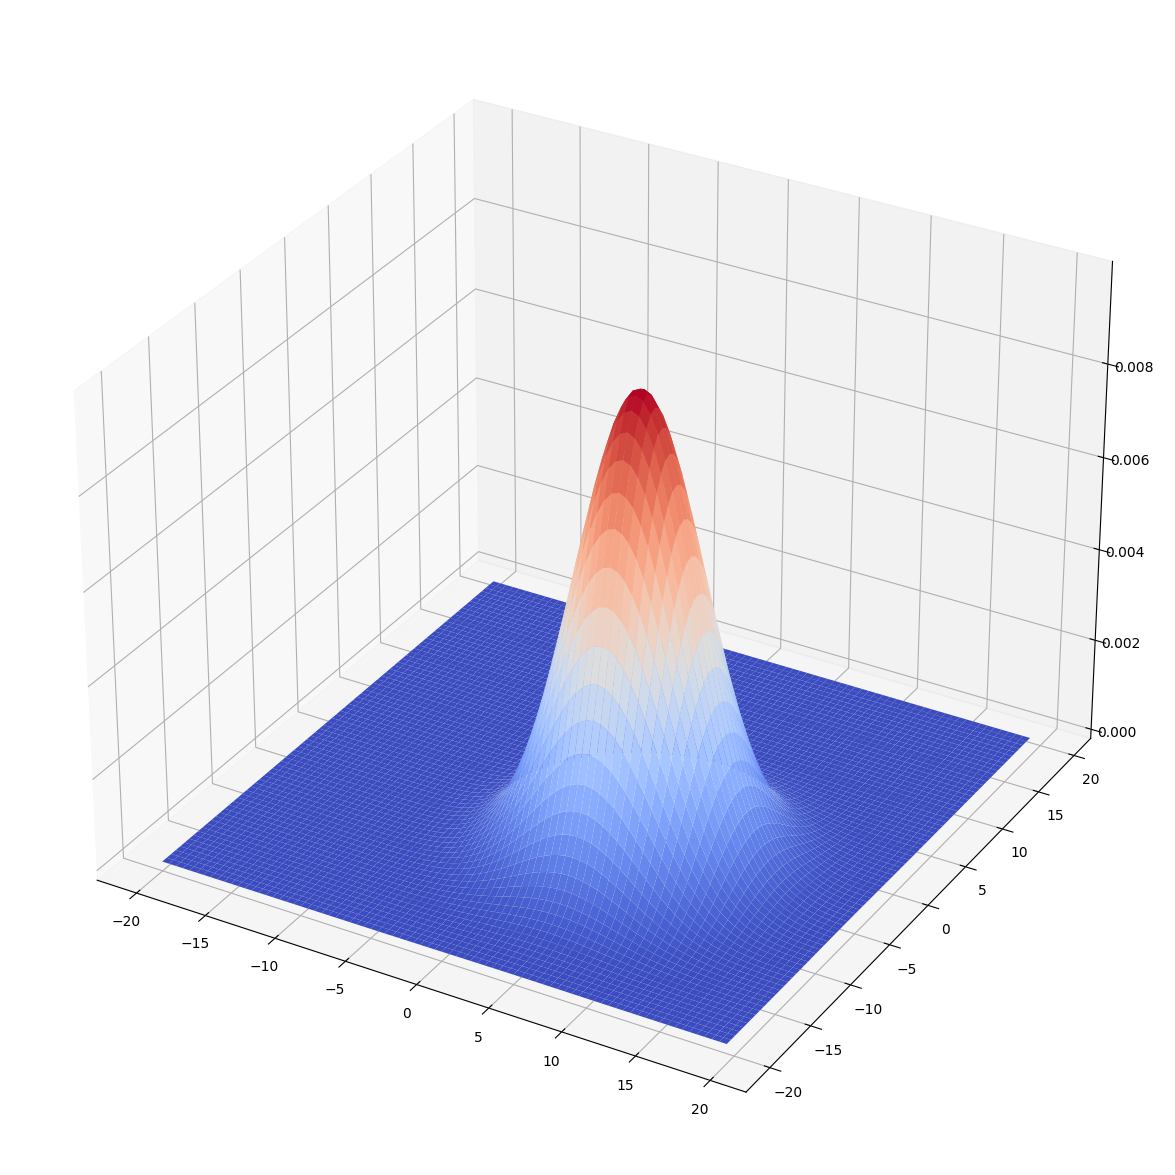

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5) #X,Y を-20~20のレンジで0.5ごとに用意(世界を分断)

X, Y = np.meshgrid(x, y)



z = np.c_[X.ravel(),Y.ravel()]


mu = np.array([5,-5])




def gaussian(x):


    return np.exp(-np.diag((x - mu)/4@(x - mu).T/4)/2.0) / (np.sqrt((2 * np.pi) **2 )*16)#打ち消し



Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



In [ ]:
from scipy import integrate
mu=np.array([[5,-5]])
def Gaus(x,y):


    X=np.array([[x,y]])


    return np.exp(-np.diag((X-mu)@(X-mu).T)/2.0/16) /np.sqrt((2 * np.pi)**2)/16

#ちゃんと引き伸ばし分が補填されてるか確認
val, err = integrate.dblquad(Gaus, -50, 50, -50, 50)

print("世界の体積=",val)


世界の体積= 1.0


対応していることを確認してみよう

>一次元 $Z=\sigma X + \mu$

$f(z)=\frac{1}{\sigma\sqrt{2\pi }}\exp(-\frac{(z-\mu)^2}{2\sigma^2})$

>多次元 $X^\prime=A X + \mu$


$f_{x^\prime}=\frac{1}{\det A\sqrt{(2\pi)^n }}\exp(\frac{-1}{2}(X^\prime-\mu)^\top(A^{-1})^\top A^{-1}(X^\prime-\mu))$




>標準偏差$\sigma=\sqrt{V[X]}$と$A$が対応していることがわかる．

それもそのはず．


$V[X^\prime]=AV[X]A^\top=AA^\top$なので

$\det A = \sqrt{V[X]}$となるし  
$(A^{-1})^\top A^{-1}=V[X^\prime]^{-1}$となるから,  

対応していて当然. 偶然ではないのだ  

人によっては$V$で表記を統一したい人もいるため見慣れておこう


>一次元

$f(z)=\frac{1}{\sqrt{2\pi V}}\exp(-\frac{(z-\mu)^2}{2 V})$

>多次元


$f_{x^\prime}=\frac{1}{\sqrt{(2\pi)^n \det V}}\exp(\frac{-1}{2}(X^\prime-\mu)^\top V^{-1}(X^\prime-\mu))$






### Case3: Rotating

最後に．ここまで来たら後はどんな形の宇宙でも作れる．Aという行列をスケーリングと回転のために採用して


x,y軸方向に2,5倍する行列$D=\begin{bmatrix}2&0\\0&5\end{bmatrix}$


45deg回転行列$Q=\begin{bmatrix}\frac{1}{\sqrt{2}}&-\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}\end{bmatrix}$

$X^\prime=QDX$

とすれば，

>$A=QD$より

$f_{x^\prime}=\frac{1}{\det A\sqrt{(2\pi)^n }}\exp(\frac{-1}{2}(X^\prime-\mu)^\top(A^{-1})^\top A^{-1}(X^\prime-\mu))$



>あるいは$V=AA^\top $の表記で

$f_{x^\prime}=\frac{1}{\sqrt{(2\pi)^n \det V}}\exp(\frac{-1}{2}(X^\prime-\mu)^\top V^{-1}(X^\prime-\mu))$





A= [[ 1.41421356 -3.53553391]
 [ 1.41421356  3.53553391]]
detA= 9.999999999999998
Sigma= [[ 14.5 -10.5]
 [-10.5  14.5]]


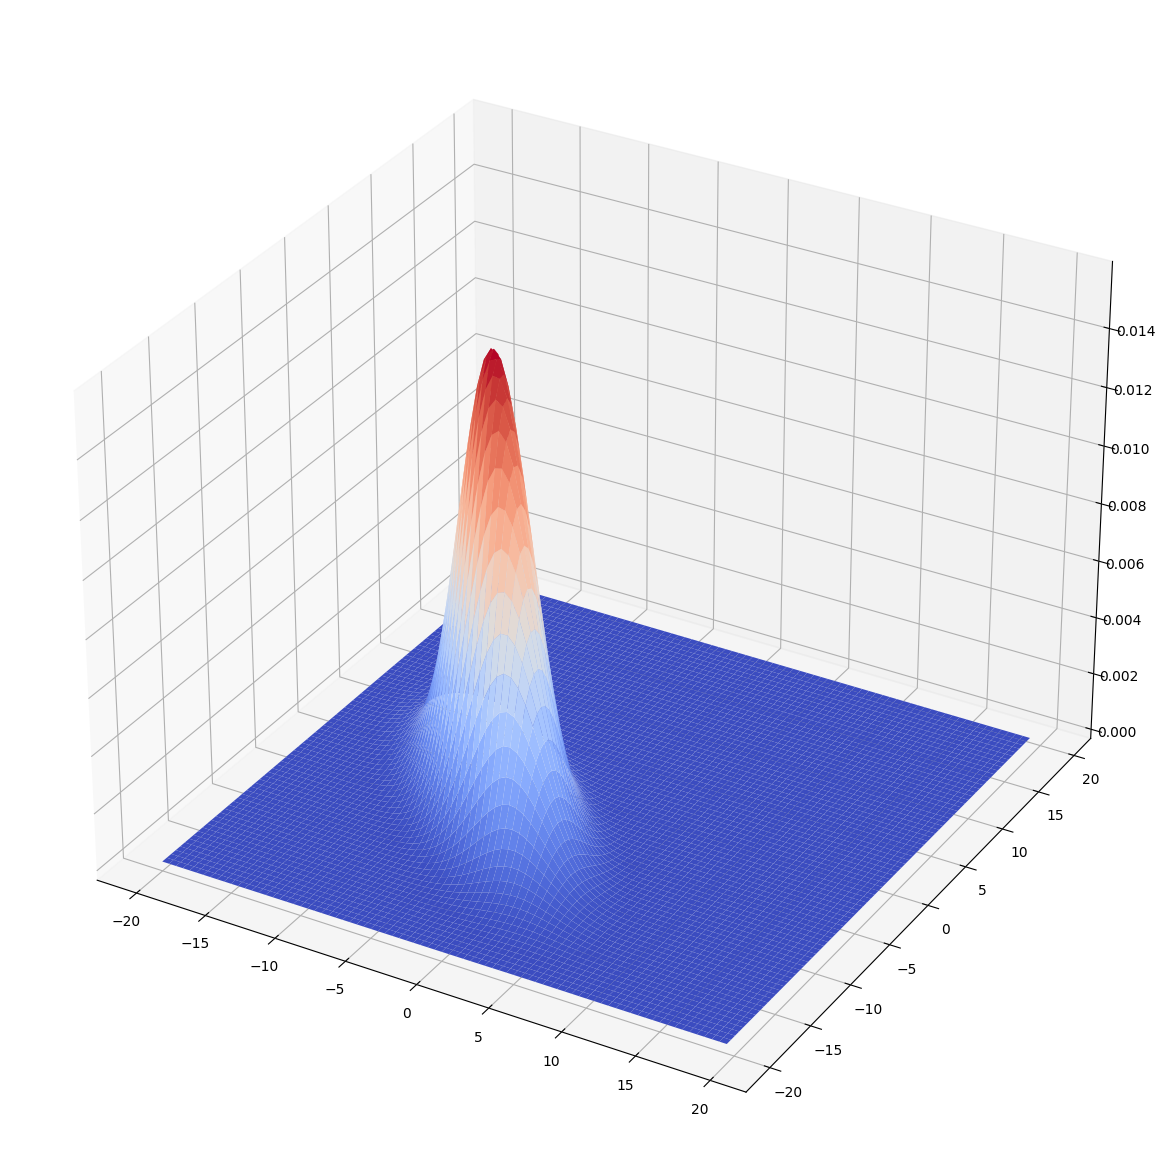

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5) #X,Y を-20~20のレンジで0.5ごとに用意(世界を分断)

X, Y = np.meshgrid(x, y)



z = np.c_[X.ravel(),Y.ravel()]


mu = np.array([-5,-5])


D = np.array([[2,0],[0,5]])
Q= np.array([[1/2**0.5,-1/2**0.5],[1/2**0.5,1/2**0.5]])

A=Q@D
print("A=",A)
print("detA=", np.linalg.det(A))

sigma = A@A.T
print("Sigma=",sigma)

def gaussian(x):
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    n = x.ndim

    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n*det ))#打ち消し


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



この逆を応用してVを直交行列で対角化すると元の回転QとスケーリングDの行列を暴くこともできる

$V=QDD^\top Q^\top$  
$Q^\top V Q=DD^\top$

### Case4: Cutting


最後に多次元正規分布の"切り口"に関する性質をいくつか紹介する．



**1. Cov=0の時点で独立とわかる**



多次元正規分布の場合Covが0だとそれは無回転を表すのですぐに,
$X_1,X_2$がマルチバース世界を直交して斬るような関係にあることがわかる (=切り口が定数倍にしかならない=確率密度をそれぞれの確率密度の積で表せる)


A= [[ 1.41421356 -3.53553391]
 [ 1.41421356  3.53553391]]
detA= 9.999999999999998
Sigma= [[ 14.5 -10.5]
 [-10.5  14.5]]


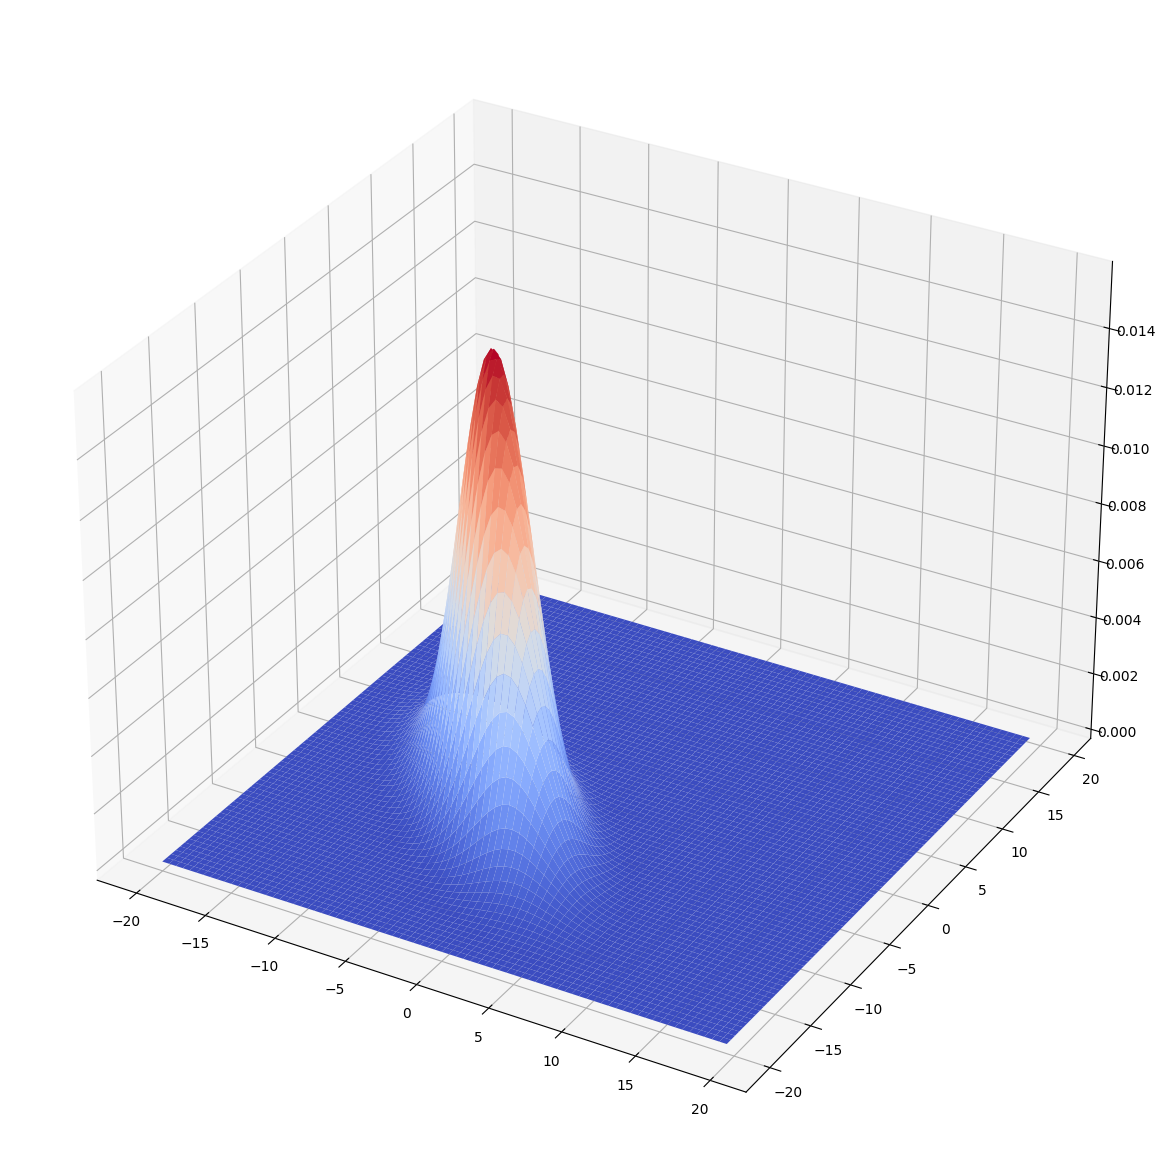

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


x = y = np.arange(-20, 20, 0.5) #X,Y を-20~20のレンジで0.5ごとに用意(世界を分断)

X, Y = np.meshgrid(x, y)



z = np.c_[X.ravel(),Y.ravel()]


mu = np.array([-5,-5])


D = np.array([[2,0],[0,5]])
Q= np.array([[1/2**0.5,-1/2**0.5],[1/2**0.5,1/2**0.5]])

A=Q@D
print("A=",A)
print("detA=", np.linalg.det(A))

sigma = A@A.T
print("Sigma=",sigma)

def gaussian(x):
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    n = x.ndim

    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n*det ))#打ち消し


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



**2. 切り口は条件付き確率となる**



多次元正規分布を例えば$X_1=c$で切ってみる．$X_2$と独立かにかかわらず，何かしらの分布になる，これが$X_1=c$での$X_2$の条件付き確率:


$f(X_2|X_1=c)=\exp(\frac{-1}{2}\begin{bmatrix}c&X_2\end{bmatrix}\begin{bmatrix}V_1&Cov_{1,2}\\Cov_{2,1}&V_{2}\end{bmatrix}\begin{bmatrix}c\\X_2\end{bmatrix})*\text{constant}$  


となる. 簡単のために期待値は0としてある，$\text{constant}$ は積分値を1にするための定数



In [ ]:
from scipy import integrate
mu=np.array([[5,-5]])
c=4

def preGaus(y):

    X=np.array([[c,y]])

    return np.exp(-np.diag((X-mu)@(X-mu).T)/2.0/16) /np.sqrt((2 * np.pi)**2)/16

constant, err = integrate.quad(preGaus, -50, 50) #正規化のための定数

def Gaus(y):

    X=np.array([[c,y]])

    return np.exp(-np.diag((X-mu)@(X-mu).T)/2.0/16) /np.sqrt((2 * np.pi)**2)/16/constant

val, err = integrate.quad(Gaus, -50, 50)

print("世界の体積=",val)


世界の体積= 1.0000000000000007


**3. 影は周辺化となる**

同時分布から$X_1$の存在の一切を抹消して$X_2$だけの分布が知りたい(=$X_1$を積分消去したい)なら...定義通りに計算してもいいけどどうせ$X_1$を含んでる項は定数あるいは1次になるので全て計算式って平方完成するまで全貌はわからない．

でも最後には$X_2$の2次式になることは決まってんだから最初から$X_1$を含んでいない項だけで正規分布作ればいいやん

$\int f_{X_1,X_2} dx_1=f_{x_2}\leftarrow 理屈はわかるけどどんな姿かわからない$

$f_{X_1,X_2}\leftarrow ハナっからX_1を無視してf_{X_2}作ればいい$


→$E[X],V[X]$から$X_1$を含んでるとこだけを抜いて再構成した$E,V$で正規分布を作る$=f_{X_2}$





A= [[ 1.41421356 -3.53553391]
 [ 1.41421356  3.53553391]]
detA= 9.999999999999998
V= [[ 14.5 -10.5]
 [-10.5  14.5]]


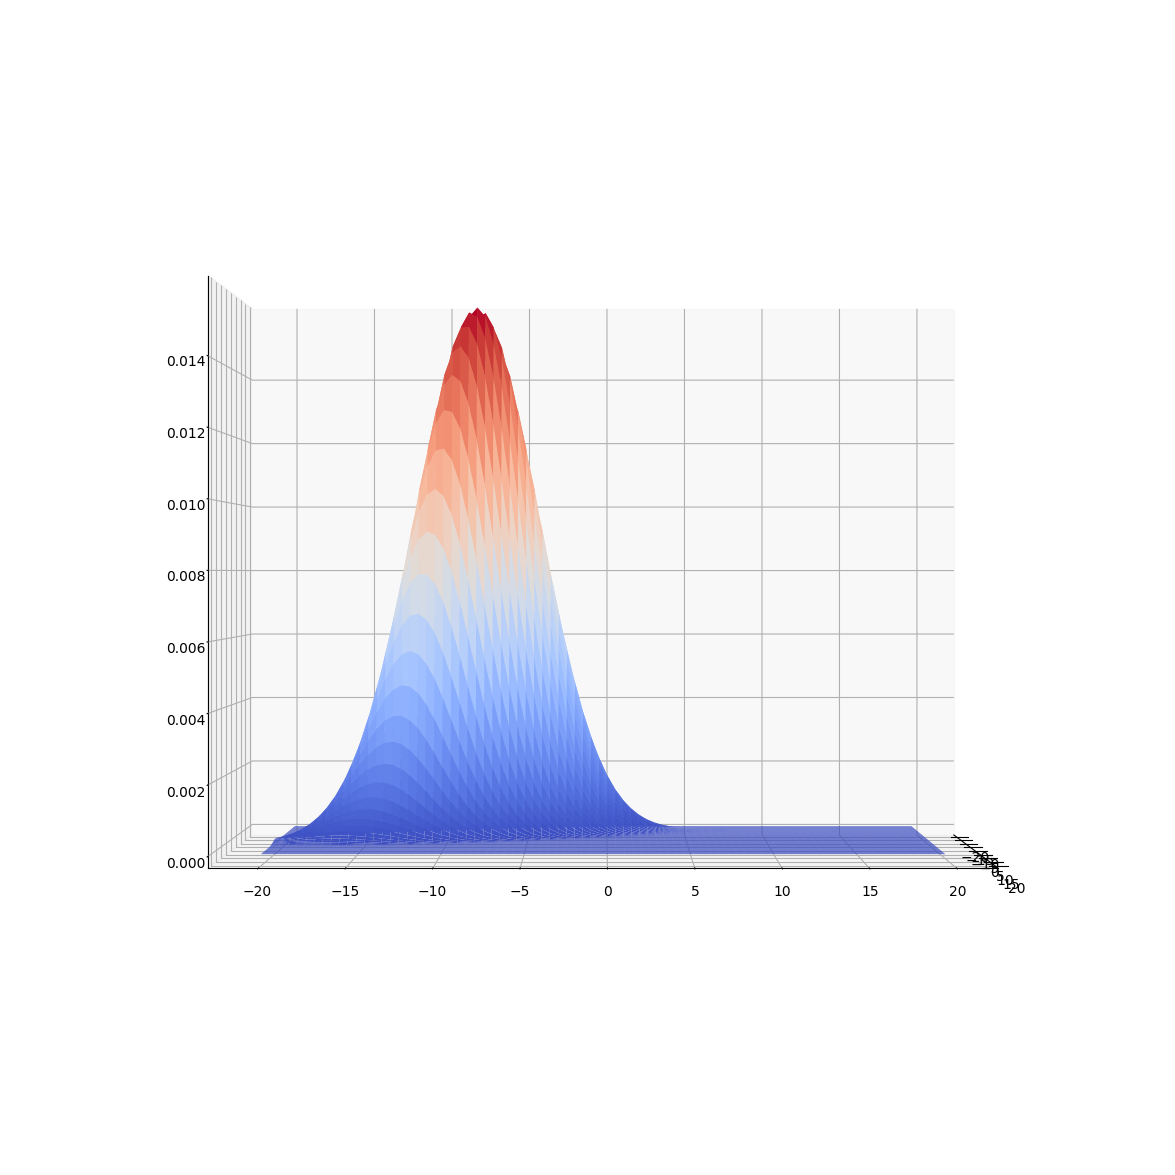

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

#X_1を周辺化した姿を見るためにX_2軸から眺めてみる

x = y = np.arange(-20, 20, 0.5)

X, Y = np.meshgrid(x, y)


z = np.c_[X.ravel(),Y.ravel()]


mu = np.array([-5,-8])


D = np.array([[2,0],[0,5]])
Q= np.array([[1/2**0.5,-1/2**0.5],[1/2**0.5,1/2**0.5]])

A=Q@D
print("A=",A)
print("detA=", np.linalg.det(A))

V = A@A.T
print("V=",V)

def gaussian(x):
    det = np.linalg.det(V)
    inv = np.linalg.inv(V)
    n = x.ndim


    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n*det ))


Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=00, azim=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()



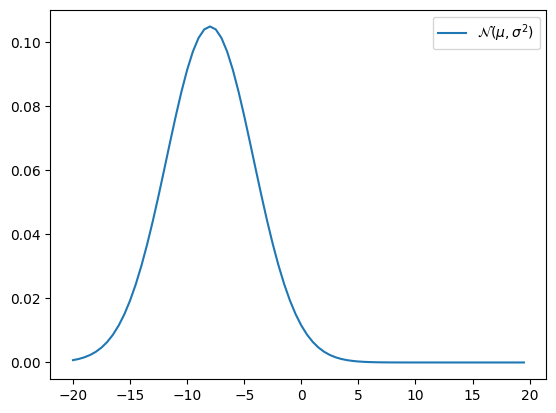

世界の面積= 1.0


In [ ]:
#X_1を周辺化した姿を見るために,X_1の関わっていないE_2, V_2で分布を作ってみる

mu=-8
sigma=14.5**0.5

def f(x):
  return np.exp(-(x-mu)**2/2/sigma**2)/(2*np.pi)**0.5/sigma

x=np.arange(-20, 20, 0.5)
y=f(x)
plt.plot(x,y,label="$\mathcal{N}(\mu,\sigma^2)$")
plt.legend()
plt.show()

val, err = integrate.quad(f, -50, 50)

print("世界の面積=",val)

## 第6章 Estimation




